# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Afif Dhia Pratama
- **Email:** afifpratama141@gmail.com
- **ID Dicoding:** affprtama

## Problem Statement

Pada analisis kali ini, ditunjukkan data dari suatu perusahaan E-Commerce yang terdiri dari data geografis, customer, dan order/pemesanan. Berdasarkan data tersebut, saya ingin mengetahui bagaimana perilaku konsumen pada perusahaan tersebut. Pemahaman konsumen yang lebih mendalam tersebut dapat mendorong perusahaan untuk meningkatkan penjualannya dan profit yang diperoleh.

## Menentukan Pertanyaan Bisnis

**Specific**
- Bagaimana Demografi konsumen pelanggan yang kita miliki?

**Measurable** 
- Produk apa yang paling banyak dan paling sedikit terjual? 
- Wilayah mana saja yang memiliki tingkat transaksi dan penjualan tertinggi dan terendah? 
- Jenis pembayaran apakah yang paling sering digunakan customers dan memiliki jumlah nilai terbesar saat pembelian? 
- Bagaimana tingkat kepuasan konsumen apabila diukur melalui tingkat delay pengiriman dan review produk? DONE)

**Action Oriented**
- Bagaimana strategi yang dapat diterapkan untuk meningkatkan penjualan berdasarkan karakteristik konsumen yang ada? 

**Relevant**
- Persiapan apa saja yang perlu dilakukan untuk melaksanakan strategi tersebut? 

**Time-Bound** 
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir? 


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Menyimpan data customers pada dataset customers_dataset ke customers_df
customers_df = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Menyimpan data geolocation_dataset ke geo_df
geo_df = pd.read_csv("E-Commerce Public Dataset/geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# Menyimpan data orders items ke order_items_df
order_items_df = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Menyimpan data orders payment ke order_payments_df
order_payments_df = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Menyimpan data order reviews ke order_reviews_df
order_reviews_df = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# Menyimpan data orders dataset ke orders_df
orders_df = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Menyimpan data products dataset ke products_df
products_df = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
# Menyimpan data sellers dataset ke sellers_df
sellers_df = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
# Menyimpan data product_category_name_translation
product_translate_df = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
product_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Terdapat 8 dataset yang digunakan dalam analisis kali ini yang mencakup customers_dataset, geolocation_dataset, order_items_dataset, product_category_name_translation, order_payment_dataset, order_reviews_dataset, orders_dataset, products_dataset, sellers_dataset.
- Untuk menjawab pertanyaan bisnis di atas, tidak semua kolom pada dataset akan digunakan pada analisis. Beberapa kolom penting yang akan digunakan seperti customers_city, customers_state, order_delivered_customer_date, order_estimated_delivery_date, seller_city, seller_state, product_category_name, dan seterusnya yang akan dijelaskan pada tahap berikutnya.

### Assessing Data

#### Menilai Data `customers_df`

In [11]:
# Memeriksa informasi dari data customers_df
customers_df.info()

# Informasi data menunjukkan bahwa semua tipe data sesuai pada data customers_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
# Identifikasi missing values
customers_df.isna().sum()
# Hasil menunjukkan tidak ada missing value

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
# Identifikasi jumlah duplikasi pada data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
# Memeriksa parameter statistik dalam kolom numerik
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Data `geo_df`

In [14]:
# Memeriksa data pada tiap kolom
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
# Memeriksa Missing Values
geo_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
# Memeriksa jumlah duplikasi data
print("Jumlah duplikasi: ", geo_df.duplicated().sum())
# Memeriksa parameter statistik dari data
geo_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai Data `order_items_df`

In [17]:
# Memeriksa informasi order_items_df
order_items_df.info()
# shipping_limit_date seharusnya memiliki tipe data date bukan object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
# Memeriksa missing values
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
# Memeriksa jumlah duplikasi
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
# Memeriksa parameter statistik
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai `order_payments_df`

In [20]:
# Memeriksa informasi order_payments_df
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
# Memeriksa missing values order_payments_df
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
# Memeriksa duplikasi data order_payments_df
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
# Memeriksa parameter statistik order_payments_df
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai `order_reviews_df`

In [23]:
# Memeriksa informasi order_reviews_df
order_reviews_df.info()
# kolom review_creation_date dan review_answer_timestamp seharusnya memiliki tipe data Date, namun karena tidak relevan pada analisis ini maka kolom tersebut akan dihapus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
# Memeriksa missing values
order_reviews_df.isna().sum()
# Review_comment_title dan review_comment_message memeiliki banyak missing values, namun karena tidak relevan pada analisis ini maka dua kolom tersebut akan dihapus

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
# Memeriksa parameter statistik order_reviews_df
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai `orders_df`

In [26]:
# Memeriksa informasi data orders_df
orders_df.info()
# Data date dan timestamp seharusnya memiliki tipe data Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
# Memeriksa missing value orders_df
orders_df.isna().sum()
# Analisis ini hanya mengidentifikasi berapa banyak penjualan yang tiba sesuai estimasi waktu
# Data order_approved_at tidak relevan dari tujuan analisis sehingga dapat dibuang
# missing value dari data order_delivered_carrier_date dan order_delivered_customer_date berasal dari data yang memiliki status processed, shipped, etc.
# Sehingga missing value dari dua data tersebut dapat dibuang karena tidak relevan dengan analisis.


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
# Memeriksa duplikasi data 
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
# Memeriksa parameter statistik data
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai `products_df`

In [29]:
# Memeriksa informasi products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
# Memeriksa missing values
products_df.isna().sum()
# Mungkin bisa didrop 

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [31]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", products_df.duplicated().sum())
# Memeriksa parameter statistik data
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai `sellers_df`


In [32]:
# Memeriksa informasi data
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [33]:
# Memeriksa missing values data
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [34]:
# Memeriksa jumlah duplikasi data
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
# Memeriksa parameter statistik data
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### Menilai `product_translate_df`

In [35]:
# Menilai informasi data
product_translate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
# Memeriksa missing values
product_translate_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
# Memeriksa jumlah duplikasi data
print("Jumlah duplikasi: ", product_translate_df.duplicated().sum())
# Memerika parameter statistik
product_translate_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Terdapat data yang memiliki duplikasi data dan perlu untuk didrop
- Terdapat data yang memiliki missing values, kebanyakan perlu didrop beserta kolom datanya karena tidak relevan terhadap analisis.
- Beberapa data memiliki tipe data object yang seharusnya Date / Time, oleh karena itu perlu diubah tipe data tersebut pada proses cleaning data.
- customers_df
    - Data aman dan telah bersih
- geo_df
    - Data bermasalah, memiliki duplikasi data yang banyak
- order_items_df
    - shipping_limit_date seharusnya memiliki tipe data date bukan object
- order_reviews_df
    - kolom review_answer_timestamp seharusnya memiliki tipe data Date, namun karena tidak relevan pada analisis ini maka kolom tersebut akan dihapus
    - review_comment_title dan review_comment_message memeiliki banyak missing values, namun karena tidak relevan pada analisis ini maka dua kolom tersebut akan dihapus
- orders_df
    - Data date dan timestamp seharusnya memiliki tipe data Date
    - Analisis ini hanya mengidentifikasi berapa banyak penjualan yang tiba sesuai estimasi waktu. Data order_approved_at tidak relevan dari tujuan analisis sehingga dapat dibuang. 
    - missing value dari data order_delivered_carrier_date dan order_delivered_customer_date berasal dari data yang memiliki status processed, shipped, etc. Sehingga missing value dari dua data tersebut dapat dibuang karena tidak relevan dengan analisis.
- products_df
    - terdapat missing values pada data
- sellers_df
    - data aman dan bersih, tidak perlu masuk ke tahap cleaning
- product_translate_df
    - data aman dan bersih, tidak perlu masuk ke tahap cleaning


### Cleaning Data

#### Cleaning `geo_df` 

In [38]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [39]:
# Menghilangkan data duplicate
geo_df.drop_duplicates(inplace=True)


In [40]:
# Cek jumlah duplikasi data
print("Jumlah duplikasi: ", geo_df.duplicated().sum())

Jumlah duplikasi:  0


#### Cleaning order_items_df

**order_items_df**
- shipping_limit_date seharusnya memiliki tipe data date bukan object

In [41]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [42]:
# Mengubah tipe data shipping_limit_date menjadi datetime
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

#### Cleaning `order_reviews_df`

**order_reviews_df**
- kolom review_creation_date dan review_answer_timestamp seharusnya memiliki tipe data Date, namun karena tidak relevan pada analisis ini maka kolom tersebut akan dihapus
- review_comment_title dan review_comment_message memeiliki banyak missing values, namun karena tidak relevan pada analisis ini maka dua kolom tersebut akan dihapus

In [43]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [44]:
# Drop kolom yang tidak relevan dengan analisis
order_reviews_df.drop(columns=[
    'review_comment_title',
    'review_comment_message',
    'review_answer_timestamp',
], inplace=True)

In [45]:
order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00


In [46]:
datetime_columns = ["review_creation_date"]

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

#### Cleaning   `orders_df`

**orders_df**
- Data date dan timestamp seharusnya memiliki tipe data Date
- Analisis ini hanya mengidentifikasi berapa banyak penjualan yang tiba sesuai estimasi waktu. Data order_approved_at dan order_delivered_carrier_date tidak relevan dari tujuan analisis sehingga dapat dibuang. 
- missing value dari data order_delivered_customer_date berasal dari data yang memiliki status processed, shipped, etc. Sehingga missing value dari dua data tersebut dapat dibuang karena tidak relevan dengan analisis.

In [47]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [48]:
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [49]:
# Drop kolom data yang tidak relevan dengan analisis
orders_df.drop(columns=[
    'order_approved_at',
    ], inplace=True)

In [50]:
# Mengubah tipe data ke Datetime
datetime_columns = [
    "order_purchase_timestamp",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    ]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [51]:
# Menangani missing values

# Cek missing values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [52]:
#Cek missing value order_delivered_carrier_date

orders_df[orders_df.order_delivered_carrier_date.isna()]

orders_df.dropna(axis=0, inplace=True)

# Berdasarkan data tersebut, menunjukkan bahwa drop data merupakan metode yang paling sesuai.
# Hal ini disebabkan karena analisis ini berfokus pada order_status delivered dan selain itu tidak relevan pada analisis ini.

#### Cleaning `products_df`

**products_df**
- terdapat missing values pada data

In [53]:
# Cek infomrasi products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [54]:
# Cek missing values
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [55]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [56]:
# Cek duplikasi pada kolom product_id
print("Jumlah duplikat di kolom product_id: ", products_df.product_id.duplicated().sum())

# Hasil menunjukkan bahwa tidak ada duplikasi sehingga semua id produk semuanya unik
# Namun, terdapat beberapa id produk yang tidak memiliki nama
# Karena keterbatasan data yang ada, id produk yang tidak memiliki nama dapat didrop untuk simplifikasi

# Drop data missing values
products_df.dropna(axis=0, inplace=True)

Jumlah duplikat di kolom product_id:  0


In [57]:
# product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm tidak relevan dengan analisis
# kolom tersebut dapat didrop

products_df.drop(columns=[
    'product_name_lenght',
    'product_description_lenght',
    'product_weight_g',
    'product_length_cm', 
    'product_height_cm', 
    'product_width_cm'],
    inplace=True)

**Insight:**

**geo_df**
- Duplikasi data geo_df sudah dihilangkan dengan metode dropping

**order_items_df**
- Mengubah tipe data shipping_limit_date ke datetime

**order_reviews_df**
- Beberapa kolom data memiliki missing values, namun karena tidak relevan dengan analisis maka kolom data tersebut didrop

**orders_df**
- Mengubah tipe data pada data date dan timestamp menjadi datetime.
- mengatasi missing values dengan drop data missing value tersebut.
- Drop data yang tidak relevan dengan analisis

**products_df**
- drop data yang tidak relevan dengan analisis
- drop missing values dari data 


## Exploratory Data Analysis (EDA)

#### Pertanyaan Bisnis

**Specific**
- Bagaimana demografi konsumen yang memiliki kontribusi signifikan dalam meningkatkan penjualan atau profit perusahaan?

**Measurable**
- Produk apa yang paling banyak dan paling sedikit terjual?
- Jenis produk manakah yang memiliki tren penjualan paling tinggi di masing-masing wilayah?
- Jenis pembayaran apakah yang paling sering digunakan customers dalam melakukan pembelian?
- Konsumen di wilayah mana saja yang memiliki tren transaksi / pembelian tertinggi? 
- Bagaimana tingkat kepuasan konsumen apabila diukur melalui tingkat kecepatan pengiriman dan review produk?
- Produk yang banyak dibeli berada di rentang harga berapa saja?

**Action Oriented**
- Bagaimana strategi yang dapat diterapkan untuk meningkatkan penjualan berdasarkan karakteristik konsumen yang ada?

**Relevant**
- Persiapan apa saja yang perlu dilakukan untuk melaksanakan strategi tersebut?

**Time-Bound**
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?


#### Explore Data `customers_df`

In [58]:
# Cek rangkuman parameter statistik
customers_df.describe(include="all")

# Customer berasal dari 4119 kota dan 27 Negara


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [59]:

# Identifikasi jumlah customer yang terdaftar dalam ecommerce berdasarkan kota (berlaku bagi customer aktif melakukan order maupun tidak)
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head()

# Hasil menunjukkan bahwa penduduk kota Sau Paulo, rio de jenairo, dan belo horizonte memiliki jumlah order terbanyak

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


In [60]:
# Identifikasi jumlah customer yang terdaftar dalam ecommerce berdasarkan negara (berlaku bagi customer aktif melakukan order maupun tidak)

customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)
# Hasil menunjukkan bahwa penduduk negara SP, RJ, dan MG memiliki jumlah order terbanyak dan yang terendah adalah RR



,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


#### Explore `orders_df`

In [61]:
orders_df.head()

# orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [62]:
# Berdasarkan data menunjukkan terdapat 96469 order terdelivered
orders_df.groupby(by="order_status").size().sort_values(ascending=False).reset_index().head()


,order_status,0
0,delivered,96469
1,canceled,6


In [63]:
# Cek order canceled
orders_df[orders_df["order_status"] == "canceled"]
# Hasil menunjukkan bahwa terdapat 6 order yang telah terdelivered namun dicancel

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


In [64]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [65]:
# Identifikasi rata-rata waktu pengiriman per order dari awal pembelian hingga diterima

# Membuat variabel baru
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds()) # Menghitung jumlah detik dari delivery time 
orders_df["delivery_time"] = round(delivery_time/86400) #diubah dalam satuan hari melalui pembagian dengan 86400
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [66]:
# Ringkasan parameter statistik dari delivery_time
orders_df["delivery_time"].describe(include="all")

# Hasil menunjukkan bahwa rata-rata lama pengiriman berjumalh 12,5 hari 
# Delay terlama menunjukkan waktu 210 hari


count    96475.000000
mean        12.517139
std          9.549719
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        210.000000
Name: delivery_time, dtype: float64

In [67]:
# Identifikasi waktu tiba barang yang melebihi waktu dan tanggal estimasi barang
is_delayed = (orders_df["order_delivered_customer_date"] - orders_df["order_estimated_delivery_date"]).dt.days 

orders_df["is_delayed"] = is_delayed > 0 # Jika True maka barang melebihi waktu dan tanggal estimasi barang
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,is_delayed
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,False


In [68]:
# Cek jumlah order yang delay dan tidak delay
# Apabila true: order delay, apabila false order: tidak delay
orders_df.groupby(by="is_delayed").size().reset_index().head()
# Berdasarkan data, terdapat total 6534 order yang mengalami delay pengiriman sektiar 6,77% pengiriman



,is_delayed,0
0,False,89941
1,True,6534


#### Eksplorasi `order_payments_df`

In [69]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [70]:
# order_payments_df.head()

order_payments_df.groupby(by="payment_type").size().sort_values(ascending=False).reset_index().head()

# Tipe pembayaran terbanyak adalah credit card, boleto (pembayaran tunai brazil), dan voucer


,payment_type,0
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [71]:
# Identifikasi jumlah jumlah payment_value tertinggi
order_payments_df.groupby(by="payment_type")["payment_value"].sum().sort_values(ascending=False).reset_index().head()
# Jumlah pembayaran terbanyak berasal dari credit card, boleto, voucher





,payment_type,payment_value
0,credit_card,12542084.19
1,boleto,2869361.27
2,voucher,379436.87
3,debit_card,217989.79
4,not_defined,0.00


#### Eksplorasi `order_reviews_df`

In [72]:
order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01


In [73]:
# Identifikasi jumlah review score 
order_reviews_df.groupby(by="review_score").size().sort_values(ascending=False).reset_index().head()


# Mayoritas review score ada di review bintang 5, bintang 4, dan bintang 1

,review_score,0
0,5,57328
1,4,19142
2,1,11424
3,3,8179
4,2,3151


#### Eksplorasi `sellers_df`

In [74]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [75]:
sellers_df.groupby("seller_city").seller_id.nunique().sort_values(ascending= False).reset_index().head(10)
# orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)
# Seller terbanyak ada di Sau paulo dan curitiba

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


In [76]:
sellers_df.groupby("seller_state").seller_id.nunique().sort_values(ascending= False)
# Seller terbanyak ada di Negara SP, PR, dan MG




seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

#### Eksplorasi data `orders_df` dan `customers_df`

In [77]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,is_delayed
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,False


In [78]:
# Membuat kolom baru bernama status untuk memeriksa customers yang aktif dalam melakukan order
customer_id_in_orders = set(orders_df.customer_id.tolist()) # Menggunakan Set daripada List untuk identifikasi kecockan yang lebih cepat
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
64012,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,Active
4537,fe39086685f95933fda7f32f50a9abcc,45c327d8b3ca237bfa0e0f6e77de9fb7,4920,sao paulo,SP,Active
1282,364f824c824823a6e6dcfce11fa7cad0,a21a8c17fb2d281bb4890748efc12200,32210,contagem,MG,Active
67241,1e44f87bfae5a9d7d58881727051db1f,34779146a256d200df2105b21e75f58f,79990,amambai,MS,Active
66832,3e3c0b3b23d15050ebec59ec39b3b597,cfbc95a8f5d5021cc8fb23e4bc873502,12916,braganca paulista,SP,Active


In [79]:
# Cek jumlah Active dan non active customers
customers_df.groupby(by="status").size().sort_values(ascending=False)

# Total terdapat 2966 consumer yang non active dan 96475 consumer active dalam melakukan pembelian, selisihnya cukup besar.


status
Active        96475
Non Active     2966
dtype: int64

In [80]:
# Menggabungkan data orders_df dan customers_df

orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,is_delayed,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,False,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,False,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,False,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,False,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,False,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [81]:
# Identifikasi customers yang secara aktif melakukan order berdasarkan kotanya
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

# terdpat 15046 consumer aktif di kota sao paulo, diikuto rio de janeiro, dan belo horizonte


,customer_city,order_id
0,sao paulo,15046
1,rio de janeiro,6604
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


In [82]:
# Identifikasi customers yang secara aktif melakukan order berdasarkan kotanya
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

# Negara SP memiliki jumlah customer terbesar sebanyak 40494, diikuti RJ, dan MG


,customer_state,order_id
0,SP,40494
1,RJ,12353
2,MG,11355
3,RS,5344
4,PR,4923
5,SC,3547
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


#### Eksplorasi `sales_df`

In [83]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [84]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [85]:
products_df.head()

,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0


In [86]:
product_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


##### Membuat Data Sales

In [87]:
# Data Sales dapat diperoleh melalui integrasi antara data order_items_df, products_df, dan order_payments_df, dan product_translation

#Menggabungkan data products_df dan product_translate_df
translated_product_df = pd.merge(
    left=products_df,
    right=product_translate_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)


 # Melihat nama barang, menunjukkan bahwa product yang kosong adalah pc_gamer dan portateis_cozinha_e_preparadores_de_alimentos
translated_product_df[translated_product_df.isna().any(axis=1)]

# translated_product_df.head()
# Mengisi Missing value dengan terjemahan yang tepat
translated_product_df.loc[(translated_product_df['product_category_name'] == 'pc_gamer') & (translated_product_df['product_category_name_english'].isna()), 'product_category_name_english'] = 'pc_gamer'
translated_product_df.loc[(translated_product_df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos') & (translated_product_df['product_category_name_english'].isna()), 'product_category_name_english'] = 'kitchen_portables_and_food_preparers'

translated_product_df[translated_product_df["product_category_name_english"] == "kitchen_portables_and_food_preparers"]

# drop kolom product_category_name karena data sudah terjemahkan dalam bahasa inggris
translated_product_df.drop(columns=[
    'product_category_name'
], inplace=True) 

translated_product_df.head()


,product_id,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,art
2,96bd76ec8810374ed1b65e291975717f,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,4.0,housewares


In [88]:
# Menggabungkan data order_items_df dan order_payments_df

order_items_payments_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_payments_df.head()


# order_reviews_df.drop(columns=[
#     'review_comment_title',
#     'review_comment_message',
#     'review_creation_date',
#     'review_answer_timestamp',
# ], inplace=True)    

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [89]:
# Menggabungkan data orders_df dengan order_items_payments_df
all_orders_df = pd.merge(
    left=order_items_payments_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id",
)
all_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,is_delayed
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,False
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,False


In [90]:
# Membuat data sales dengan menggabungkan order_items_payments_df dan translated_product_df
sales_df = pd.merge(
    left=translated_product_df,
    right=all_orders_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_df.head()



,product_id,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,...,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,is_delayed
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1.0,...,1.0,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,3.0,False
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,1.0,...,1.0,265.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,16.0,False
2,96bd76ec8810374ed1b65e291975717f,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,1.0,...,1.0,87.62,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,2.0,False
3,cef67bcfe19066a932b7673e239eb23d,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,1.0,...,2.0,121.84,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,3.0,False
4,9dc1a7de274444849c219cff195d0b71,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,1.0,...,4.0,46.19,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,3.0,False


In [91]:
sales_df.drop(columns=[
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'delivery_time'
], inplace=True) 

# sales_df.head()


In [92]:
sales_df.isna().sum()
sales_df.dropna(axis=0, inplace=True)

<!-- ##### Eksplor Data Sales -->

In [93]:
sales_df.describe(include="all")

# Berdasarkan data menunjukkan bahwa rata-rata harga barang sebanyak 120.9 Real Brasil
# Harga termahal 6,735 real brazil dan termurah 61 real brazil
# Total terdapat 115905 barang yang terjual

,product_id,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,is_delayed
count,113404,113404.000000,113404,113404,113404.000000,113404,113404,113404.000000,113404.000000,113404.000000,113404,113404.000000,113404.000000,113404,113404,113404,113404
unique,31628,NaN,73,95141,NaN,2914,NaN,NaN,NaN,NaN,4,NaN,NaN,95141,2,NaN,2
top,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,bed_bath_table,895ab968e7bb0d5659d16cd74cd1650c,NaN,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,NaN,False
freq,529,NaN,11650,63,NaN,2094,NaN,NaN,NaN,NaN,83706,NaN,NaN,63,113397,NaN,105996
mean,NaN,2.209261,NaN,NaN,1.196827,NaN,2018-01-08 04:02:06.966394368,120.183509,20.023882,1.089926,NaN,2.942127,172.238364,NaN,NaN,2018-01-01 13:34:16.757627136,NaN
min,NaN,1.000000,NaN,NaN,1.000000,NaN,2016-10-08 10:34:01,0.850000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,2016-10-03 09:44:50,NaN
25%,NaN,1.000000,NaN,NaN,1.000000,NaN,2017-09-20 19:24:46,39.900000,13.080000,1.000000,NaN,1.000000,61.000000,NaN,NaN,2017-09-13 18:41:13.750000128,NaN
50%,NaN,1.000000,NaN,NaN,1.000000,NaN,2018-01-26 14:51:56.500000,74.900000,16.320000,1.000000,NaN,2.000000,108.140000,NaN,NaN,2018-01-20 15:43:27.500000,NaN
75%,NaN,3.000000,NaN,NaN,1.000000,NaN,2018-05-10 22:30:37.500000,133.900000,21.200000,1.000000,NaN,4.000000,189.370000,NaN,NaN,2018-05-05 18:06:34.750000128,NaN
max,NaN,20.000000,NaN,NaN,21.000000,NaN,2020-04-09 22:35:08,6735.000000,409.680000,26.000000,NaN,24.000000,13664.080000,NaN,NaN,2018-08-29 15:00:37,NaN


In [94]:
# Mencari informasi terkait produk berdasarkan tipe dan nama produk
sales_df.groupby(by="product_category_name_english").agg({
    "product_id":"nunique",
    "product_photos_qty":"sum",
    "price": ["min","max"],
    "freight_value": ["min", "max"]
}).sort_values(("product_photos_qty", "sum"), ascending=False)

# Furtinere decor dan sport_leisure memiliki jumlah product terbanyak



product_id product_photos_qty   price           \
                                 nunique                sum     min      max   
product_category_name_english                                                  
furniture_decor                     2592            21299.0    4.90  1899.00   
sports_leisure                      2821            19230.0    4.50  4059.00   
health_beauty                       2397            17934.0    1.20  3124.00   
bed_bath_table                      2991            17363.0    6.99  1999.98   
housewares                          2282            16676.0    3.06  6735.00   
...                                  ...                ...     ...      ...   
home_comfort_2                         5               32.0   12.90   219.99   
cds_dvds_musicals                      1               28.0   45.00    65.00   
fashion_childrens_clothes              4               18.0   39.99   110.00   
la_cuisine                            10               17.0   24.00   389.00   
security_and_services                  2                5.0  100.00   183.29   

                              freight_value          
                                        min     max  
product_category_name_english                        
furniture_decor                        0.00  215.43  
sports_leisure                         0.01  293.27  
health_beauty                          0.00  338.30  
bed_bath_table                         0.00  225.71  
housewares                             0.02  375.28  
...                                     ...     ...  
home_comfort_2                         5.86   19.36  
cds_dvds_musicals                      9.94   52.58  
fashion_childrens_clothes              6.43   17.07  
la_cuisine                             0.11   39.19  
security_and_services                 15.45   25.77  

[73 rows x 6 columns]

In [95]:
# Identifikasi produk dengan jumlah penjualn terbesar

sales_df.groupby(by="product_category_name_english").agg({
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

# Bed Bath Table menunjukkan penjulana terbesar


,payment_value
product_category_name_english,
bed_bath_table,1692714.28
health_beauty,1620868.35
computers_accessories,1549252.47
furniture_decor,1394272.95
watches_gifts,1387046.31
...,...
pc_gamer,1925.01
home_comfort_2,1710.54
cds_dvds_musicals,1199.43


In [96]:
# Identifikasi nilai ongkir terbanyak menurut produk

sales_df.groupby(by="product_category_name_english").agg({
    "freight_value": "sum"
}).sort_values(by="freight_value", ascending=False)

# Bed Bath Table menunjukkan penjulana dan nilai ongkir terbesar


,freight_value
product_category_name_english,
bed_bath_table,214611.10
health_beauty,184737.58
furniture_decor,176925.77
sports_leisure,169281.71
housewares,150670.53
...,...
kitchen_portables_and_food_preparers,294.42
cds_dvds_musicals,224.99
pc_gamer,138.23


#### Eksplorasi `order_reviews_df` dan `orders_df` untuk identifikasi tingkat kepuasan pelanggan

In [97]:
order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01


In [98]:
orders_df.head()

orders_df.describe(include= 'all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,is_delayed
count,96475,96475,96475,96475,96475,96475,96475,96475.000000,96475
unique,96475,96475,2,NaN,NaN,NaN,NaN,NaN,2
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,False
freq,1,1,96469,NaN,NaN,NaN,NaN,NaN,89941
mean,NaN,NaN,NaN,2018-01-01 22:46:11.857268992,2018-01-05 04:14:08.754413056,2018-01-14 12:10:08.008561920,2018-01-25 16:28:20.088105728,12.517139,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN
25%,NaN,NaN,NaN,2017-09-14 08:08:09,2017-09-18 16:21:06,2017-09-25 22:07:10.500000,2017-10-05 00:00:00,7.000000,NaN
50%,NaN,NaN,NaN,2018-01-20 19:23:26,2018-01-24 15:55:11,2018-02-02 19:28:30,2018-02-16 00:00:00,10.000000,NaN
75%,NaN,NaN,NaN,2018-05-05 18:28:24.500000,2018-05-08 14:32:00,2018-05-15 22:48:54.500000,2018-05-28 00:00:00,16.000000,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000,NaN


##### Membuat Data `customer_satisfaction`

In [99]:
# customer satisfaction dihitung berdasarkan delay, waktu delivery_time , dan skor review bintang



# Menggabungkan dataframe orders_df dan order_reviews_id

customer_satisfaction_df= pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customer_satisfaction_df.head()

# Drop kolom yang tidak relevan untuk analisis customer_satisfaction
customer_satisfaction_df.drop(columns=[
    'order_status',
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'review_id',
    ], inplace=True)

customer_satisfaction_df.head()




,order_id,customer_id,delivery_time,is_delayed,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,False,4.0,2017-10-11
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,14.0,False,4.0,2018-08-08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,False,5.0,2018-08-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,False,5.0,2017-12-03
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,3.0,False,5.0,2018-02-17


In [100]:
# Membuat kondisi atau kriteria customer_satisfaction
# Membuat kolom baru bernama status untuk memeriksa customers yang aktif dalam melakukan order
"""
Kriteria:
1. Apabila Tidak ada kondisi dan satu kondisi terpenuhi maka konsumen Tidak Puas
2. Apabila satu kondisi terpenuhi maka konsumen cukup puas
3. Apabila semua kondisi terpenuhi maka konsumen Sangat puas
"""


# Kriteria delivery_time apabila waktu pengiriman > 12 hari maka tidak puas (nilai True)
# delivery_time_bool_list = set(customer_satisfaction_df.delivery_time.tolist())
# customer_satisfaction_df["delivery_time_bool_df"] = customer_satisfaction_df["delivery_time"].apply(lambda x: True if x > 12 else False)

# Kriteria delivery_time apabila review_score < 3  maka tidak puas (nilai True)
review_score_bool_list = set(customer_satisfaction_df.review_score.tolist())
customer_satisfaction_df["review_score_bool_df"] = customer_satisfaction_df["review_score"].apply(lambda x: True if x <= 3 else False)

# customer_satisfaction_df.head()


customer_satisfaction_df["is_satisfied"] = (customer_satisfaction_df['is_delayed'] + customer_satisfaction_df['review_score_bool_df']).astype(int)

customer_satisfaction_df["is_satisfied"] = customer_satisfaction_df['is_satisfied'].apply(
    lambda x: 'Tidak Puas' if x == 2 else ('Cukup Puas' if x == 1 else 'Sangat Puas')
)

customer_satisfaction_df.groupby(by="is_satisfied").size()
# customer_satisfaction_df.head()
# customer_id_in_orders_df = set(orders_df.customer_id.tolist()) # Menggunakan Set daripada List untuk identifikasi kecockan yang lebih cepat
# customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
# customers_df.sample(5)

# Mayoritas pelanggan (55474) sangat puas karena memiliki pengalaman pengiriman tidak delay dan memberikan bintang lebih dari 2
# 41930 pelanggan cukup puas karena memiliki pengalaman salah satu dari pengiriman yang tidak delay atau memberikan bintang lebih dari 2



is_satisfied
Cukup Puas     22176
Sangat Puas    74828
dtype: int64

### Membuat dan Eksplorasi `sales_by_location_df`

In [101]:
sales_by_location_df = pd.merge(
    left=sales_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on = "customer_id"
)
sales_by_location_df.drop(columns=[
    'order_item_id',
    'seller_id',
    'shipping_limit_date',
    'payment_sequential',
    'is_delayed',
    'order_status',
    'payment_installments',
    'order_purchase_timestamp',
    'customer_unique_id',
    'status',
], inplace=True)

sales_by_location_df.head()

,product_id,product_photos_qty,product_category_name_english,order_id,price,freight_value,payment_type,payment_value,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,10.91,7.39,debit_card,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,13848,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,art,5236307716393b7114b53ee991f36956,248.00,17.99,voucher,265.99,03fc97548af8f58fefc768d12b546c9c,20551,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,79.80,7.82,credit_card,87.62,e41819d1c95c12c9ce495b630eab8aee,5821,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,112.30,9.54,credit_card,121.84,322162b5ca010c2b059cb5224dd818b1,2018,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,8.29,credit_card,46.19,c11c31965ff02cc1d7132df8edfcbc22,5835,sao paulo,SP


**Insight:**
- Data frame baru dibuat termasuk sales_df, customer_satisfaction_df, order_customers_df
- customers_df
    - Hasil menunjukkan bahwa penduduk negara SP, RJ, dan MG memiliki jumlah order terbanyak dan yang terendah adalah RR
    - Hasil menunjukkan bahwa penduduk kota Sau Paulo, rio de jenairo, dan belo horizonte memiliki jumlah order terbanyak
- orders_df
    - Berdasarkan data, terdapat total 6534 order yang mengalami delay pengiriman sektiar 6,77% pengiriman
    - Hasil menunjukkan bahwa rata-rata lama pengiriman berjumalh 12,5 hari 
    - Delay terlama menunjukkan waktu 210 hari
    - Berdasarkan data menunjukkan terdapat 96469 order terdelivered
- order_payments_df
    - Jumlah pembayaran terbanyak berasal dari credit card, boleto, voucher
     - Tipe pembayaran terbanyak adalah credit card, boleto (pembayaran tunai brazil), dan voucer
- order_reviews_df
    - Mayoritas review score ada di review bintang 5, bintang 4, dan bintang 1
- sellers_df
    - Seller terbanyak ada di Negara SP, PR, dan MG
    - Seller terbanyak ada di Sau paulo dan curitiba
- order_customers_df
    - Negara SP memiliki jumlah customer terbesar sebanyak 40494, diikuti RJ, dan MG
    - terdpat 15046 consumer aktif di kota sao paulo, diikuto rio de janeiro, dan belo horizonte
    - Total terdapat 2966 consumer yang non active dan 96475 consumer active dalam melakukan pembelian, selisihnya cukup besar.
- sales_df
    - Bed Bath Table menunjukkan penjulana dan nilai ongkir terbesar
    - Furtinere decor dan sport_leisure memiliki jumlah product terbanyak
    - Housewares, computers, dan art memiliki harga termahal
    - Sedangkan yang termurah ada di construction_tools_construction dan health_beauty
    - Berdasarkan data menunjukkan bahwa rata-rata harga barang sebanyak 120.9 Real Brasil
    - Harga termahal 6,735 real brazil dan termurah 61 real brazil
    - Total terdapat 115905 barang yang terjual
- customer_satisfaction_df
    - Mayoritas pelanggan (55474) sangat puas karena memiliki pengalaman pengiriman tidak delay dan memberikan bintang lebih dari 2
    - 41930 pelanggan cukup puas karena memiliki pengalaman salah satu dari pengiriman yang tidak delay atau memberikan bintang lebih dari 2

## Visualization & Explanatory Analysis

**Specific**
- Bagaimana Demografi konsumen pelanggan yang kita miliki? (DONE)

**Measurable** 
- Produk apa yang paling banyak dan paling sedikit terjual? (DONE)
- Wilayah mana saja yang memiliki tingkat transaksi dan penjualan tertinggi dan terendah? (DONE)
- Jenis pembayaran apakah yang paling sering digunakan customers dan memiliki jumlah nilai terbesar saat pembelian? (DONE)
- Bagaimana tingkat kepuasan konsumen apabila diukur melalui tingkat delay pengiriman dan review produk? (DONE)

**Action Oriented**
- Bagaimana strategi yang dapat diterapkan untuk meningkatkan penjualan berdasarkan karakteristik konsumen yang ada? 

**Relevant**
- Persiapan apa saja yang perlu dilakukan untuk melaksanakan strategi tersebut? 

**Time-Bound** 
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir? (DONE)


### Bagaimana Demografi konsumen pelanggan yang kita miliki?

#### Berdasarkan Negara

In [102]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
 5   status                    99441 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [103]:
customer_by_state_df = customers_df.groupby(by="customer_state").size().sort_values(ascending=False).reset_index(name="customer_count").head(5)
customer_by_state_df.head()

,customer_state,customer_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1714339642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1714339642.py:4: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


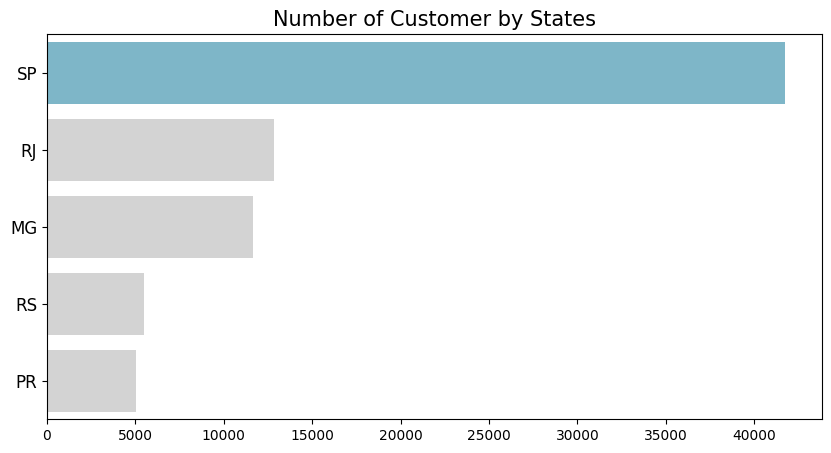

In [104]:
# Visualisasi data
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=customer_by_state_df.sort_values(by="customer_count", ascending=False),
    palette=colors_,
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### Berdasarkan Kota

In [105]:
customer_by_city_df = customers_df.groupby(by="customer_city").size().sort_values(ascending=False).reset_index(name="customer_count").head(5)
customer_by_city_df.head()

,customer_city,customer_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3561319965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3561319965.py:4: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


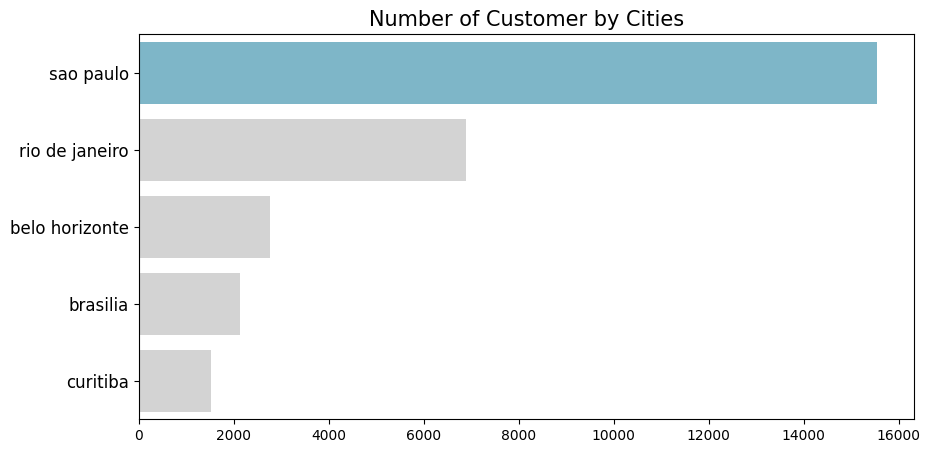

In [106]:
# Visualisasi data
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=customer_by_city_df.sort_values(by="customer_count", ascending=False),
    palette=colors_,
)
plt.title("Number of Customer by Cities", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Produk apa yang paling banyak dan paling sedikit terjual?

In [107]:
# Buat variabel untuk menghitung jumlah terbanyak berdasarkan nama produk
sum_order_items_df = sales_df.groupby("product_category_name_english").product_photos_qty.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "product_category_name_english": "product_name",
    "product_photos_qty": "quantity"
}, inplace=True)
sum_order_items_df.head(15)

,product_name,quantity
0,furniture_decor,21299.0
1,sports_leisure,19230.0
2,health_beauty,17934.0
3,bed_bath_table,17363.0
4,housewares,16676.0
5,watches_gifts,15191.0
6,computers_accessories,13764.0
7,telephony,13359.0
8,toys,11655.0
9,auto,10737.0


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\2368336257.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\2368336257.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_name", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])


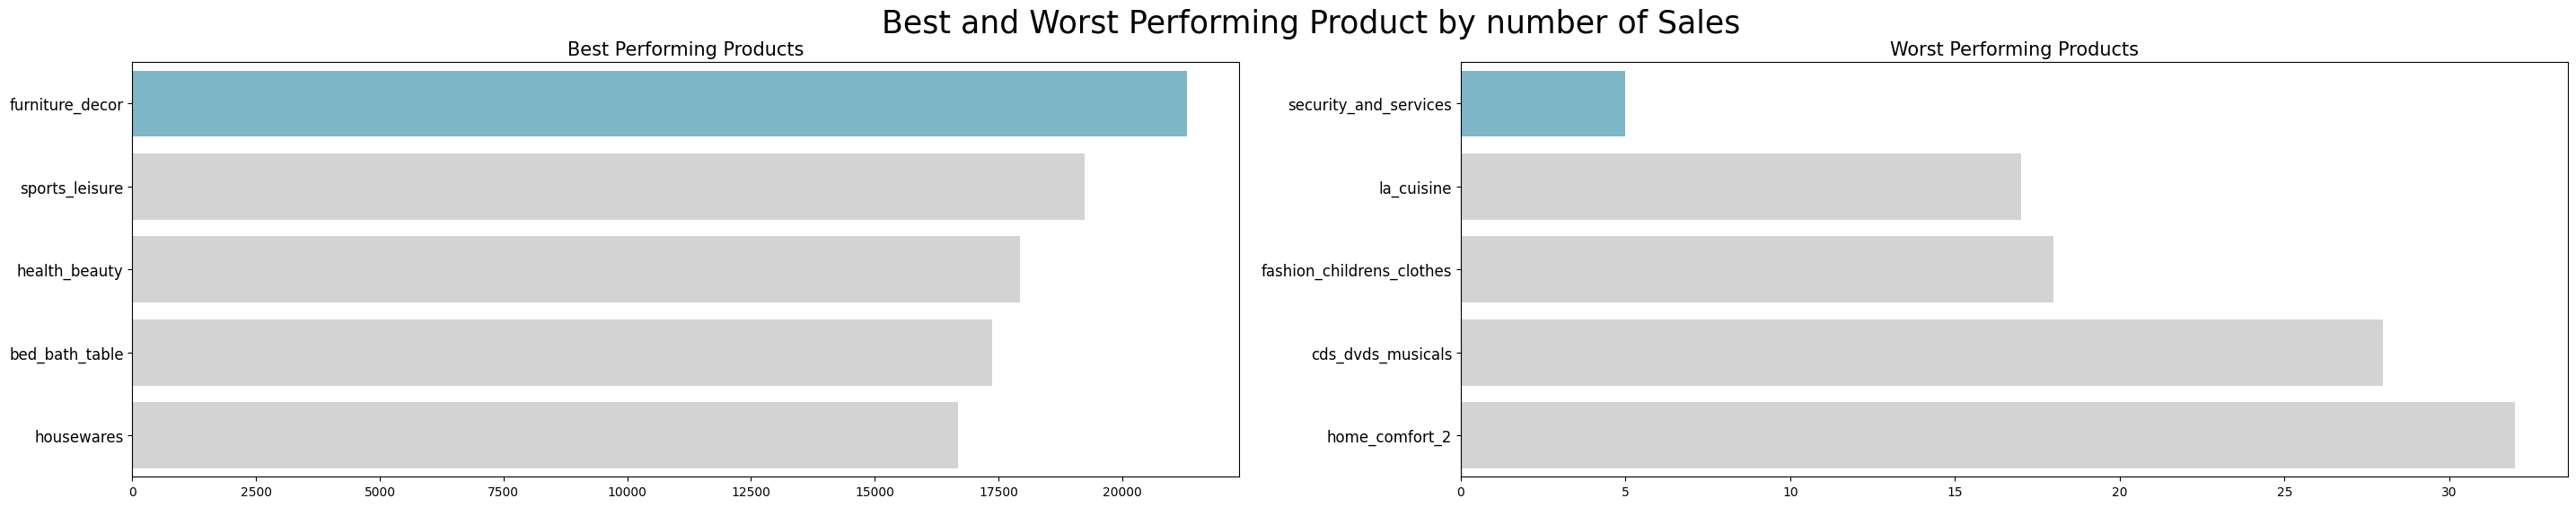

In [108]:
# Membuat visualisasi data dalam bentuk Bar Chart
# dibuat dari performa penjualan terbaik dan terburuk menggunakan subplot

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(35, 6)) # Membuat dua kanvas grafik untuk perbandingan

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Products", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="quantity", y="product_name", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Performing Products", loc="center",fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by number of Sales", fontsize=25) # Judul Main plot
plt.show()

#### Identifikasi Pendapatan per Produk

In [109]:
## Identifikasi pendapatan
sum_revenue_items_df = sales_df.groupby("product_category_name_english").price.sum().sort_values(ascending=False).reset_index()
sum_revenue_items_df.rename(columns={
    "product_category_name_english": "product_name",
    "price": "revenue"
}, inplace=True)
sum_revenue_items_df.head(15)

,product_name,revenue
0,health_beauty,1271413.18
1,watches_gifts,1213162.80
2,bed_bath_table,1077968.13
3,sports_leisure,990486.72
4,computers_accessories,918837.87
5,furniture_decor,746004.40
6,housewares,648187.74
7,cool_stuff,634403.75
8,auto,602881.75
9,garden_tools,492390.08


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1899333497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="product_name", data=sum_revenue_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1899333497.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="product_name", data=sum_revenue_items_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])


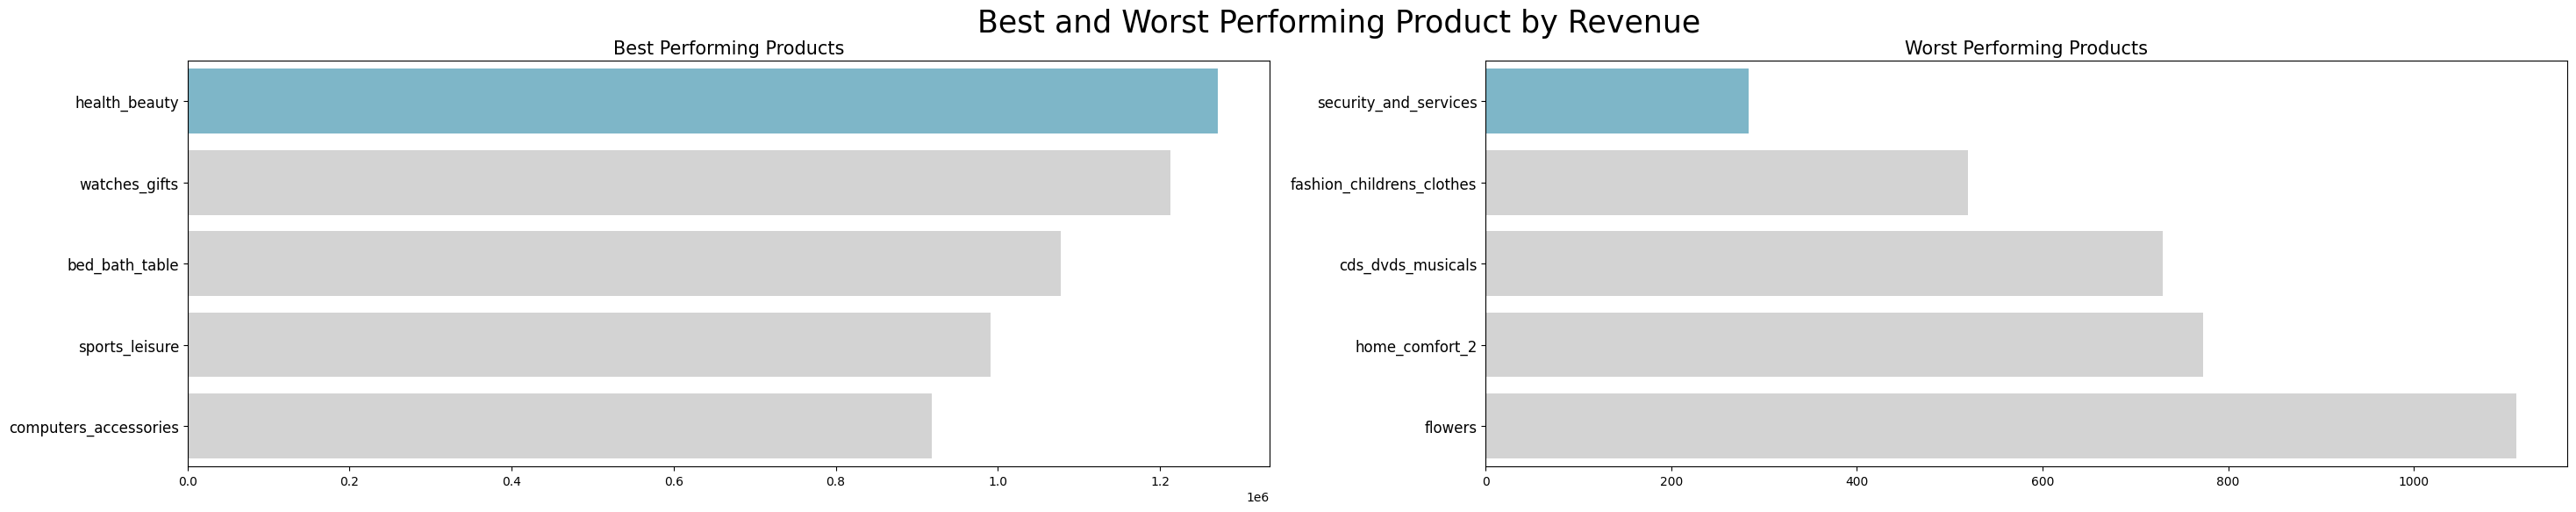

In [110]:
# Membuat visualisasi data dalam bentuk Bar Chart
# dibuat dari performa penjualan terbaik dan terburuk menggunakan subplot

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(35, 6)) # Membuat dua kanvas grafik untuk perbandingan

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="revenue", y="product_name", data=sum_revenue_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Products", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="revenue", y="product_name", data=sum_revenue_items_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Performing Products", loc="center",fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Revenue", fontsize=25) # Judul Main plot
plt.show()

### Wilayah mana saja yang memiliki tingkat transaksi dan penjualan tertinggi dan terendah? 

#### Tingkat Pendapatan Berdasarkan Negara

In [111]:
sales_df.head()

,product_id,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,is_delayed
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1.0,debit_card,1.0,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,False
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,1.0,voucher,1.0,265.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,False
2,96bd76ec8810374ed1b65e291975717f,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,1.0,credit_card,1.0,87.62,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,False
3,cef67bcfe19066a932b7673e239eb23d,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,1.0,credit_card,2.0,121.84,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,False
4,9dc1a7de274444849c219cff195d0b71,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,1.0,credit_card,4.0,46.19,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,False


In [112]:
# Menampilkan pendapatan terbanyak berdasarkan negara

sales_revenue_by_states_df = sales_by_location_df.groupby("customer_state").price.sum().sort_values(ascending=False).reset_index()
sales_revenue_by_states_df.rename(columns={
    "price" : "revenue",
},inplace=True)
sales_revenue_by_states_df.head()


,customer_state,revenue
0,SP,5237080.36
1,RJ,1822527.09
2,MG,1588196.61
3,RS,755970.67
4,PR,680319.20


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3045809223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="customer_state", data=sales_revenue_by_states_df.head(5), palette=colors, ax=ax[0])
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3045809223.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="customer_state", data=sales_revenue_by_states_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])


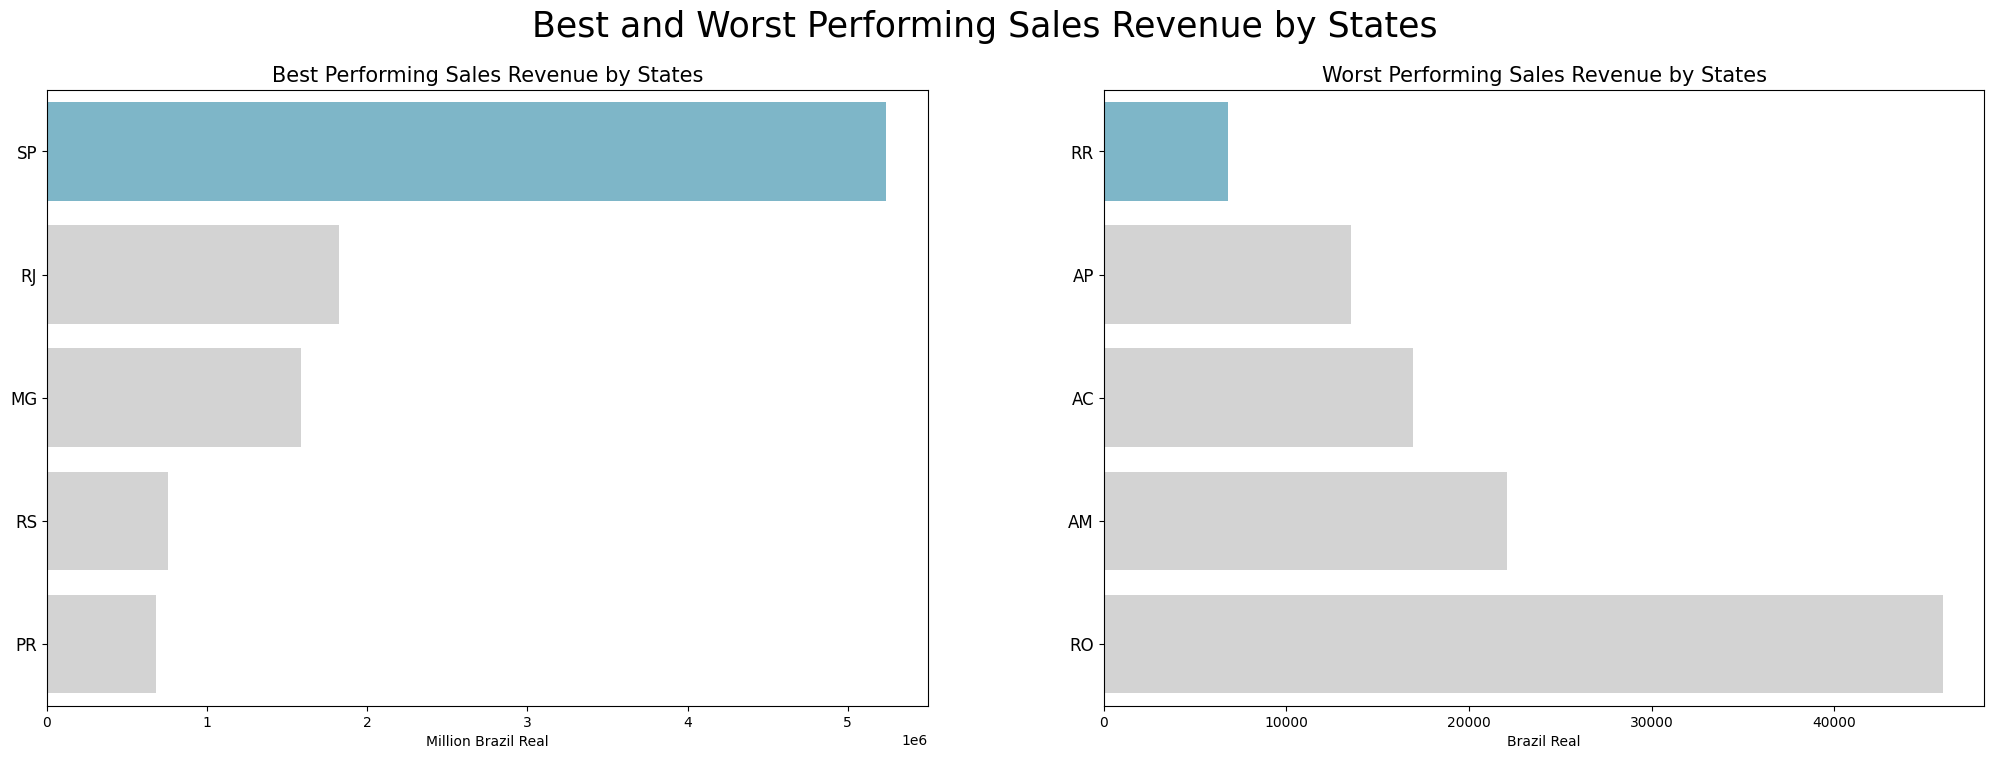

In [113]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(25, 8)) # Membuat dua kanvas grafik untuk perbandingan

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="revenue", y="customer_state", data=sales_revenue_by_states_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Million Brazil Real")
ax[0].set_title("Best Performing Sales Revenue by States", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="revenue", y="customer_state", data=sales_revenue_by_states_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Brazil Real")
ax[1].set_title("Worst Performing Sales Revenue by States", loc="center",fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Sales Revenue by States", fontsize=25) # Judul Main plot
plt.show()

#### Banyaknya Penjualan Berdasarkan Negara

In [114]:
# Menampilkan jumlah transaksi terbanyak
number_of_sales_by_states_df = sales_by_location_df.groupby("customer_state").order_id.count().sort_values(ascending=False).reset_index()
number_of_sales_by_states_df.rename(columns={
    "order_id" : "number_of_sales"
},inplace=True)
number_of_sales_by_states_df.head()

,customer_state,number_of_sales
0,SP,47834
1,RJ,14654
2,MG,13237
3,RS,6286
4,PR,5790


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3419163349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="number_of_sales", y="customer_state", data=number_of_sales_by_states_df.head(5), palette=colors, ax=ax[0])
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3419163349.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="number_of_sales", y="customer_state", data=number_of_sales_by_states_df.sort_values(by="number_of_sales", ascending=True).head(5), palette=colors, ax=ax[1])


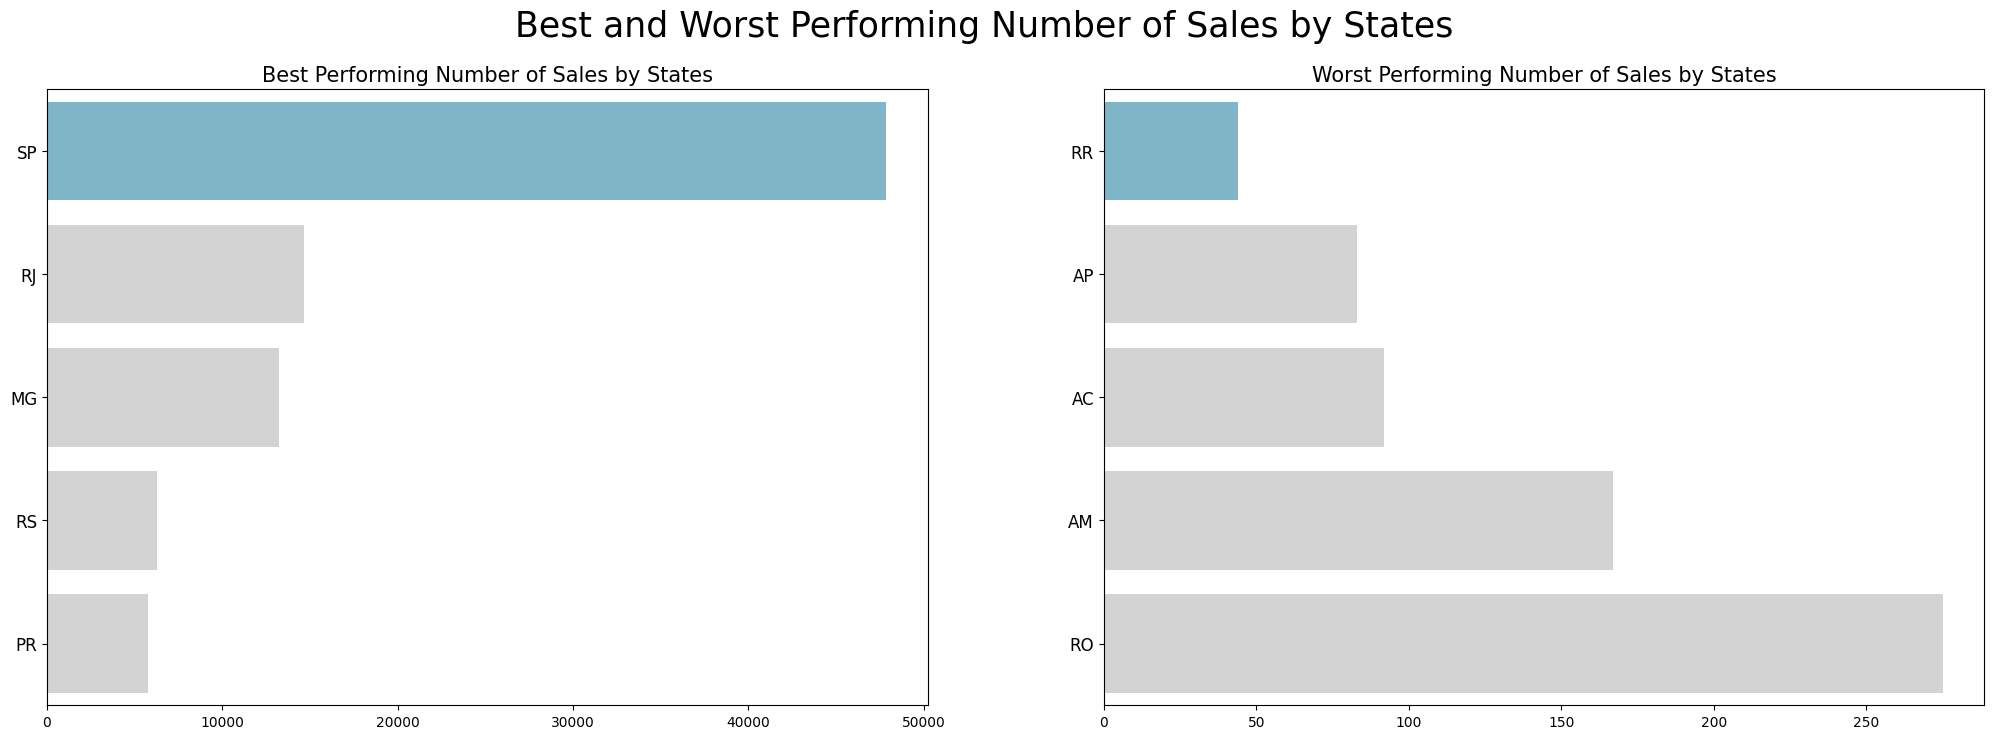

In [115]:
# Visualisasi data jumlah penjualan
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(25, 8)) # Membuat dua kanvas grafik untuk perbandingan

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="number_of_sales", y="customer_state", data=number_of_sales_by_states_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Number of Sales by States", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="number_of_sales", y="customer_state", data=number_of_sales_by_states_df.sort_values(by="number_of_sales", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Performing Number of Sales by States", loc="center",fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Number of Sales by States", fontsize=25) # Judul Main plot
plt.show()

#### Tingkat Penjualan Berdasarkan Kota

In [116]:

# Berdasarkan kota
sales_revenue_by_cities_df = sales_by_location_df.groupby("customer_city").price.sum().sort_values(ascending=False).reset_index()
sales_revenue_by_cities_df.rename(columns={
    "price" : "revenue",
},inplace=True)
sales_revenue_by_cities_df.head()

,customer_city,revenue
0,sao paulo,1921420.72
1,rio de janeiro,982058.93
2,belo horizonte,353079.36
3,brasilia,303594.22
4,curitiba,210957.32


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1609089533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="customer_city", data=sales_revenue_by_cities_df.head(5), palette=colors, ax=ax[0])
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1609089533.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="customer_city", data=sales_revenue_by_cities_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])


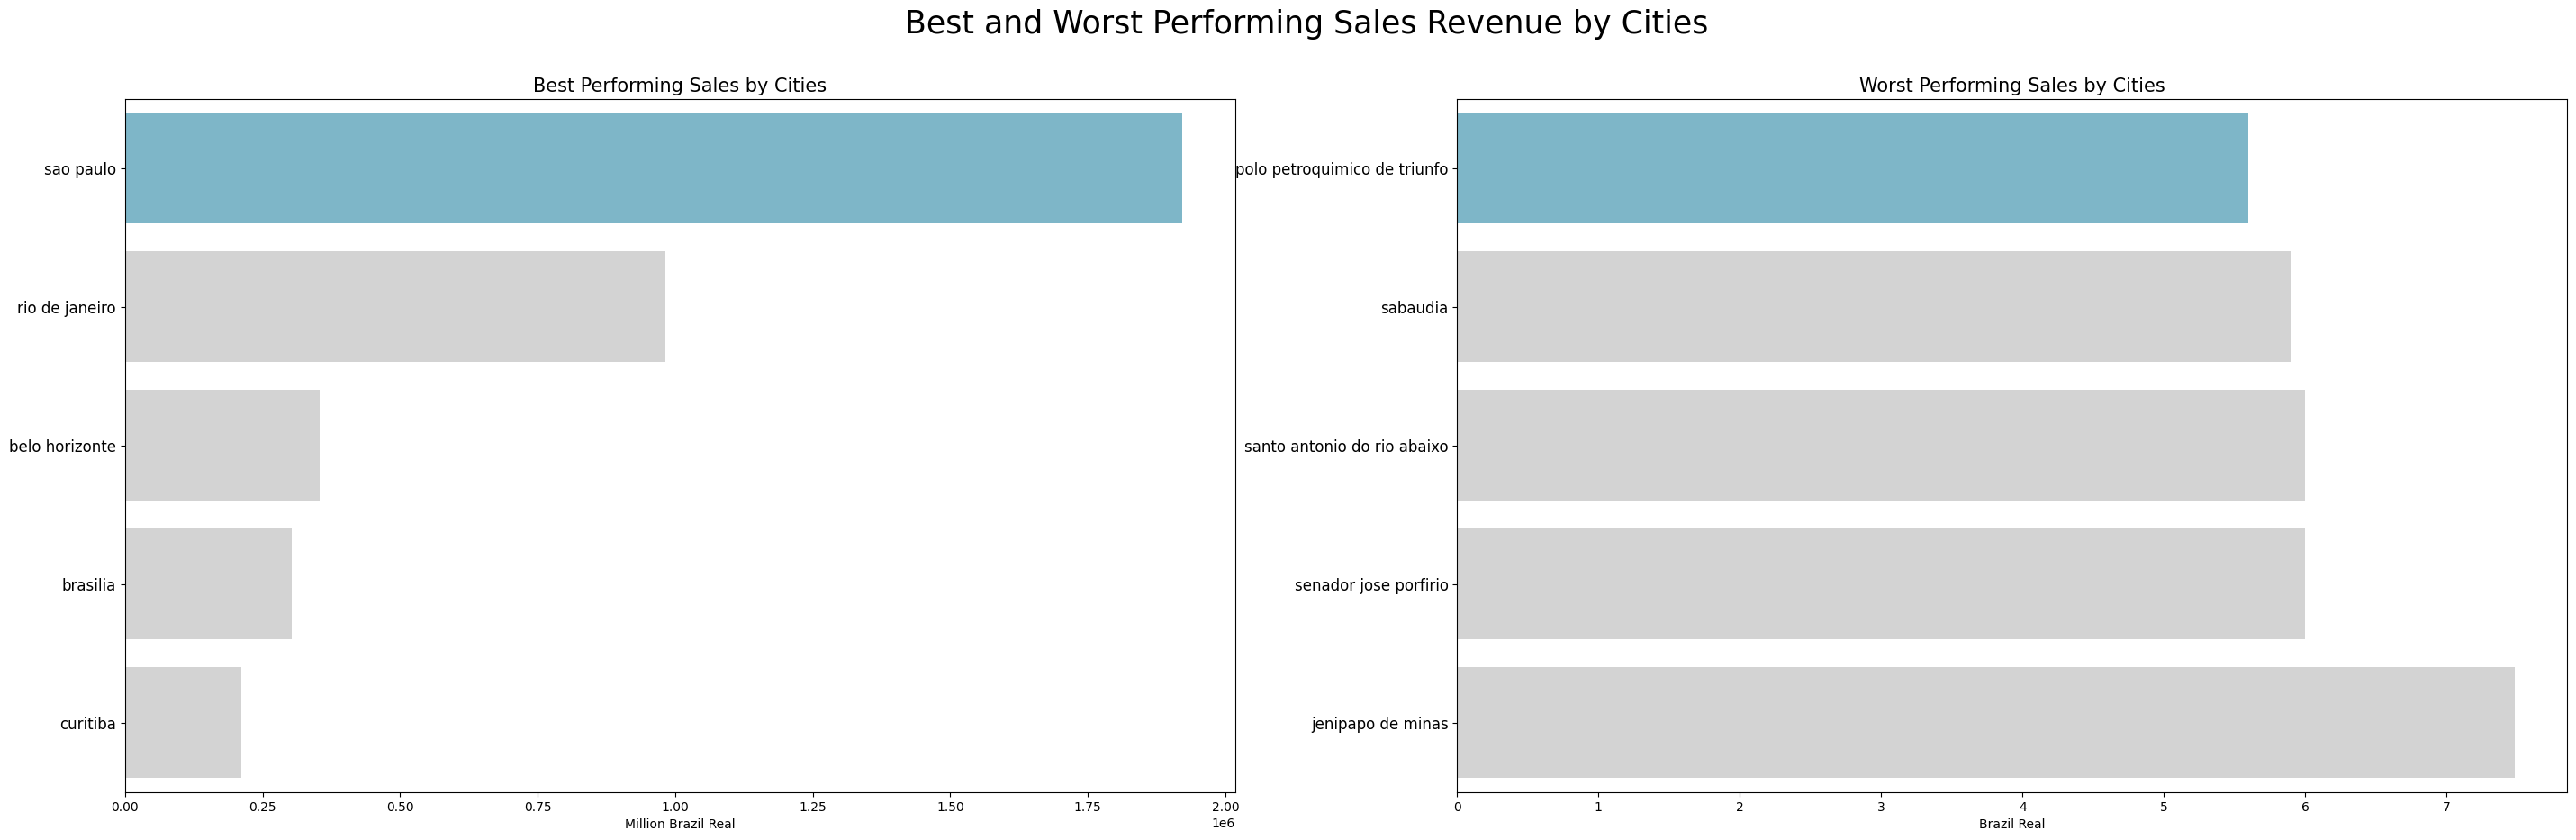

In [117]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(35, 10)) # Membuat dua kanvas grafik untuk perbandingan

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="revenue", y="customer_city", data=sales_revenue_by_cities_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Million Brazil Real")
ax[0].set_title("Best Performing Sales by Cities", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="revenue", y="customer_city", data=sales_revenue_by_cities_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Brazil Real")
ax[1].set_title("Worst Performing Sales by Cities", loc="center",fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Sales Revenue by Cities", fontsize=25) # Judul Main plot
plt.show()

#### Banyaknya Penjualan Berdasarkan Kota

In [118]:
# Menampilkan jumlah transaksi terbanyak
number_of_sales_by_cities_df = sales_by_location_df.groupby("customer_city").order_id.count().sort_values(ascending=False).reset_index()
number_of_sales_by_cities_df.rename(columns={
    "order_id" : "number_of_sales"
},inplace=True)
number_of_sales_by_cities_df.head()

,customer_city,number_of_sales
0,sao paulo,17869
1,rio de janeiro,7824
2,belo horizonte,3134
3,brasilia,2374
4,curitiba,1768


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\4036081259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="number_of_sales", y="customer_city", data=number_of_sales_by_cities_df.head(10), palette=colors, ax=ax[0])
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\4036081259.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="number_of_sales", y="customer_city", data=number_of_sales_by_cities_df.sort_values(by="number_of_sales", ascending=True).head(10), palette=colors, ax=ax[1])


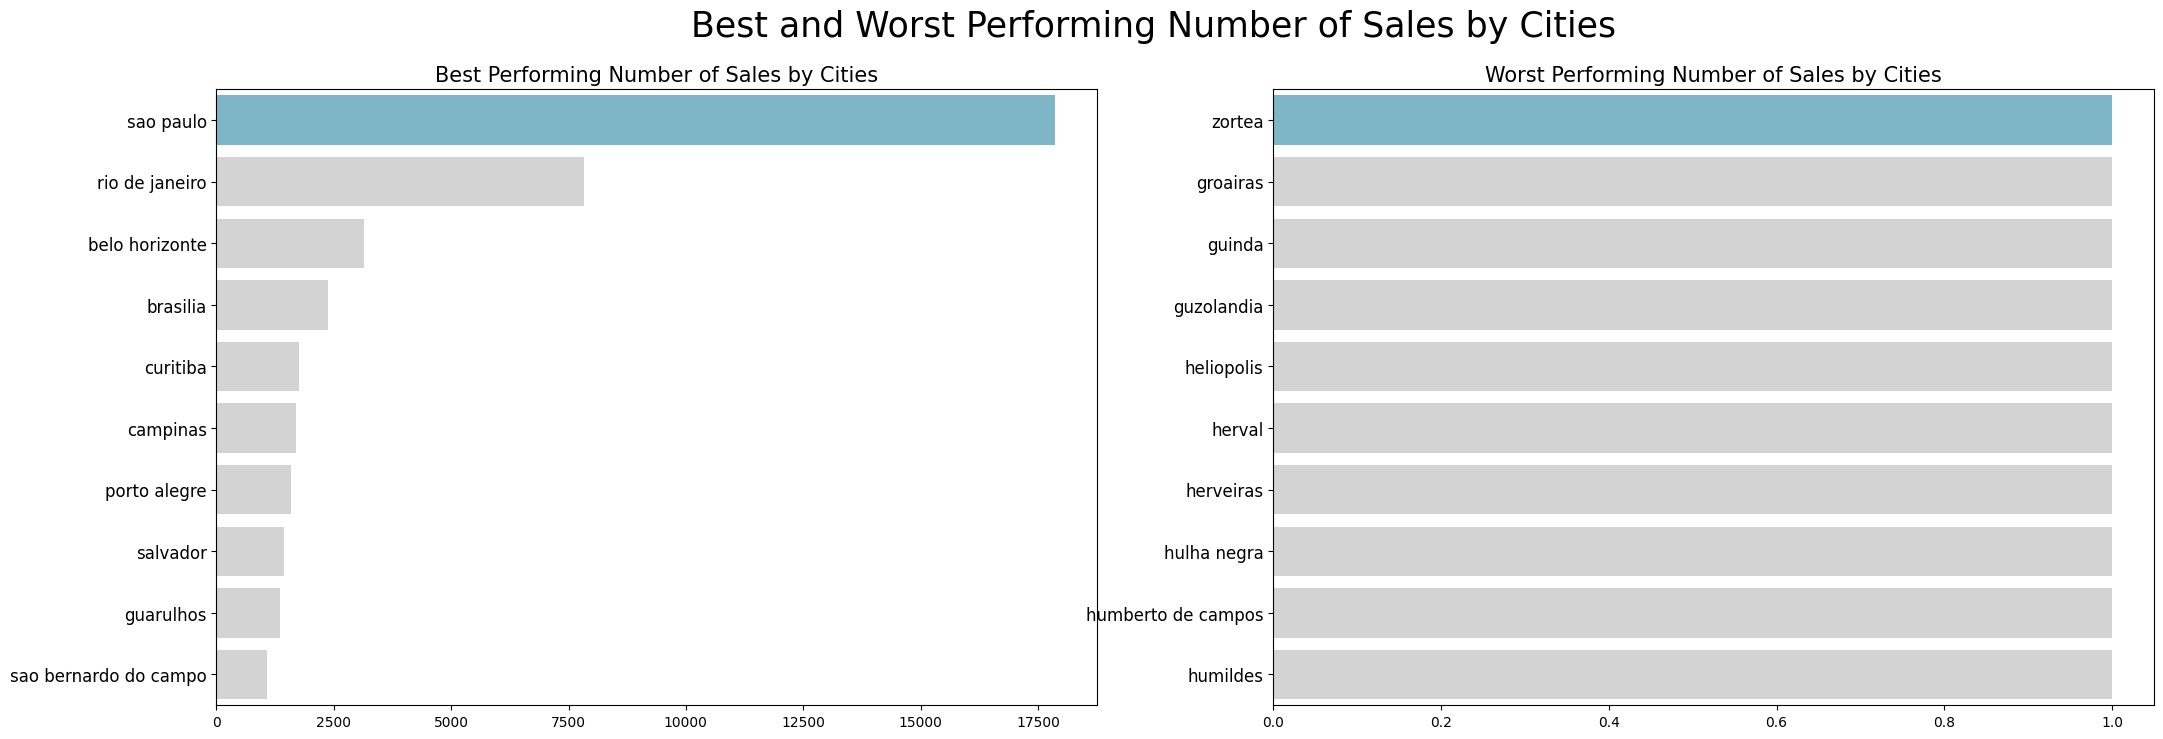

In [119]:
# Visualisasi data jumlah penjualan
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(25, 8)) # Membuat dua kanvas grafik untuk perbandingan

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="number_of_sales", y="customer_city", data=number_of_sales_by_cities_df.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Number of Sales by Cities", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="number_of_sales", y="customer_city", data=number_of_sales_by_cities_df.sort_values(by="number_of_sales", ascending=True).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Performing Number of Sales by Cities", loc="center",fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Number of Sales by Cities", fontsize=25) # Judul Main plot
plt.show()

# Hasil menunjukkan banyak kota yang hanya punya jumlah pembelian sebesar satu saja

### Jenis pembayaran apakah yang paling sering digunakan customers dan memiliki jumlah nilai terbesar saat pembelian?

In [120]:
order_payments_df.groupby(by="payment_type").size().sort_values(ascending=False).reset_index().head()

,payment_type,0
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


#### Jenis Payment yang Paling Populer digunakan

In [121]:
sales_df.groupby(by ="payment_type").size()

payment_type
boleto         22061
credit_card    83706
debit_card      1625
voucher         6012
dtype: int64

In [122]:
# Membuat variabel type of payment untuk menghitung total jenis payment
popular_type_of_payment_df = sales_df.groupby(by = "payment_type")["order_id"].count().sort_values(ascending=False).reset_index()
popular_type_of_payment_df.rename(columns={
    "order_id" : "payment_count"
}, inplace = True)
popular_type_of_payment_df.head()

,payment_type,payment_count
0,credit_card,83706
1,boleto,22061
2,voucher,6012
3,debit_card,1625


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3796512405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3796512405.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


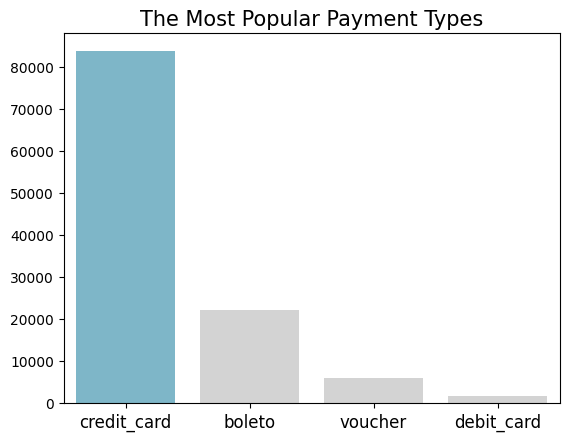

In [123]:
# Membuat figur barplot
sns.barplot(
    y='payment_count',
    x = 'payment_type',
    data=popular_type_of_payment_df.sort_values(by="payment_count", ascending=False),
    palette=colors,
)
plt.title("The Most Popular Payment Types", loc="center", fontsize = 15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x',labelsize=12)
plt.show()

#### Jenis Pembayaran yang Memiliki Nilai Pembayaran terbesar

In [124]:
# Membuat variabel value type of payment untuk menghitung nilai pembelian terbesar berdasarkan jenis pembayaran
value_type_of_payment_df = sales_df.groupby("payment_type")["payment_value"].sum().sort_values(ascending=False).reset_index()

# value_type_of_payment_df.rename(columns={
#     "order_id" : "payment_count"
# }, inplace = True)
value_type_of_payment_df.head()

,payment_type,payment_value
0,credit_card,15011952.95
1,boleto,3888514.80
2,voucher,389060.48
3,debit_card,242991.23


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3488751907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\3488751907.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


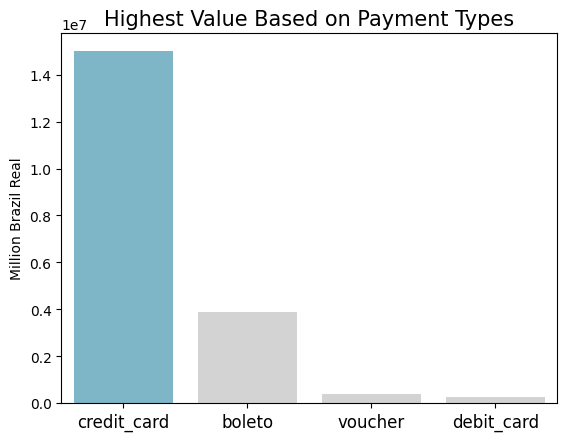

In [125]:
# Membuat Bar plot
sns.barplot(
    y='payment_value',
    x='payment_type',
    data=value_type_of_payment_df,
    palette=colors
)
plt.title("Highest Value Based on Payment Types", loc="center", fontsize=15)
plt.ylabel("Million Brazil Real")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

# credit card has highest payment value, followed by boleto (cash type on brazil)


### Bagaimana tingkat kepuasan konsumen apabila diukur melalui tingkat delay pengiriman dan review produk?

#### Rata-Rata Reviews Score 2016 - 2018

In [126]:
customer_satisfaction_df.head()

,order_id,customer_id,delivery_time,is_delayed,review_score,review_creation_date,review_score_bool_df,is_satisfied
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,False,4.0,2017-10-11,False,Sangat Puas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,14.0,False,4.0,2018-08-08,False,Sangat Puas
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,False,5.0,2018-08-18,False,Sangat Puas
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,False,5.0,2017-12-03,False,Sangat Puas
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,3.0,False,5.0,2018-02-17,False,Sangat Puas


In [127]:
#### Rata-Rata Reviews Score 2016 - 2018

#resample data dalam urutan time-series
monthly_reviews_df = customer_satisfaction_df.resample(rule='ME', on='review_creation_date').agg({
    "review_score":"mean",
})
monthly_reviews_df.index = monthly_reviews_df.index.strftime('%Y-%m')
monthly_reviews_df= monthly_reviews_df.reset_index()
monthly_reviews_df.rename(columns={
    "review_creation_date":"review_date",

}, inplace=True)

monthly_reviews_df.head(50)


,review_date,review_score
0,2016-10,4.143678
1,2016-11,3.566265
2,2016-12,4.214286
3,2017-01,4.350211
4,2017-02,4.295422
5,2017-03,4.211255
6,2017-04,4.160392
7,2017-05,4.172510
8,2017-06,4.227452
9,2017-07,4.269037


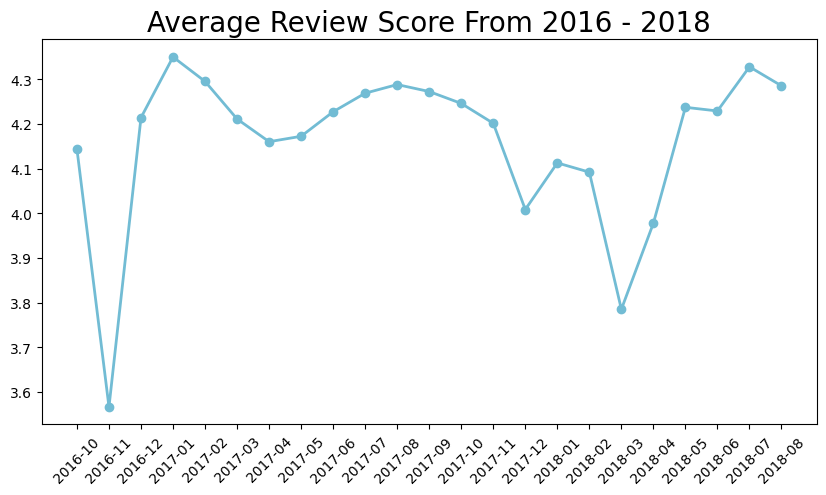

In [128]:
# Membuat visualisasi data
plt.figure(figsize=(10,5))
plt.plot(monthly_reviews_df["review_date"], monthly_reviews_df["review_score"], marker='o', linewidth = 2, color="#72BCD4")
plt.title("Average Review Score From 2016 - 2018", loc="center", fontsize=20) 
plt.yticks(fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

#### Review Score dalam kurun waktu 30 hari terakhir

In [129]:
# Filter data jadi hanya 30 hari terakhir
last_date = customer_satisfaction_df['review_creation_date'].max()
start_date_last_30_days = last_date - pd.Timedelta(days=29)
last_30_days_reviews_df = customer_satisfaction_df[
    customer_satisfaction_df['review_creation_date'] >= start_date_last_30_days
]

# Group by review_score and count the number of reviews for each score
review_score_distribution_df = last_30_days_reviews_df.groupby("review_score").size().reset_index(name="review_count")

review_score_distribution_df.head(50)

,review_score,review_count
0,1.0,630
1,2.0,218
2,3.0,596
3,4.0,1627
4,5.0,5262


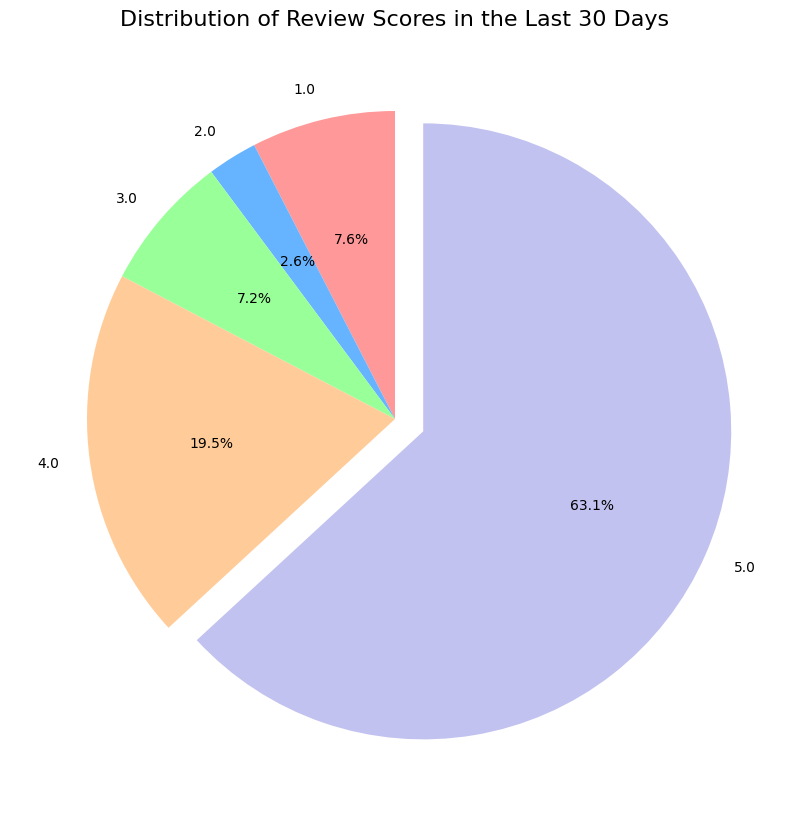

In [130]:
# Visualisasi data

plt.figure(figsize=(8,8))
plt.pie(
    x= review_score_distribution_df['review_count'], # Nilai Piechart
    labels=review_score_distribution_df['review_score'],
    autopct='%1.1f%%', # Menampilkan persentase dari chart
    startangle=90, ## Rotate the chart to start from the top
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],  # Custom colors
    explode=(0, 0, 0, 0, 0.1)  # "Explode" the first slice
)

plt.tight_layout()
plt.title('Distribution of Review Scores in the Last 30 Days', fontsize=16)
plt.show()

# Hasil menunjukkan performa produk dari reviews sangat positif dalam 30 hari terakhir

#### Persentase Order yang Delay

In [131]:
delay_percentage_df = customer_satisfaction_df.groupby("is_delayed").order_id.count().reset_index()
delay_percentage_df.rename(columns={
    "order_id":"total"
}, inplace=True)
delay_percentage_df.head()

,is_delayed,total
0,False,90442
1,True,6562


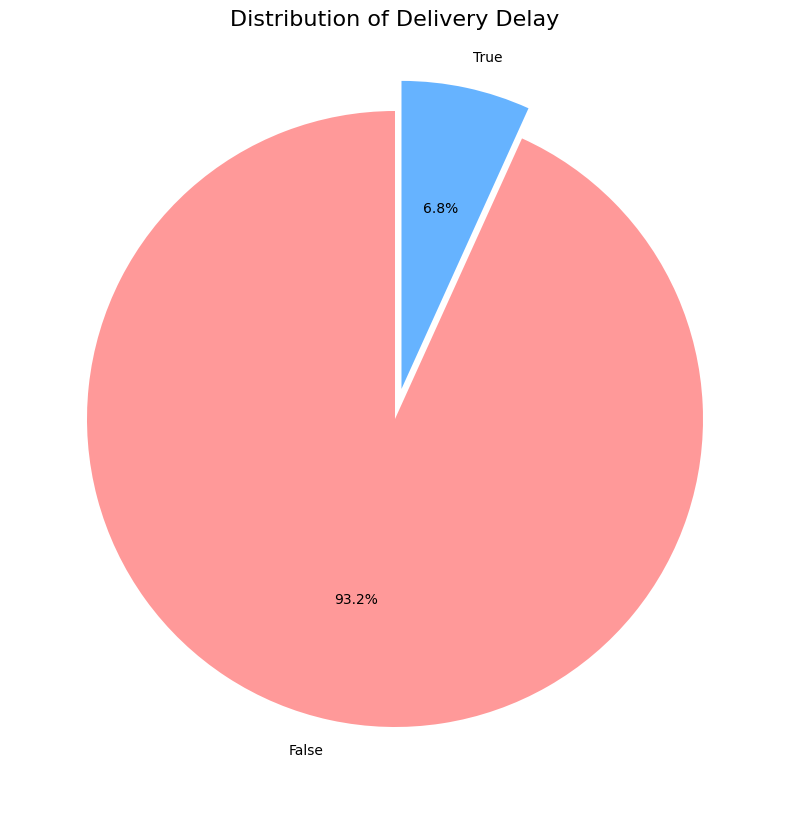

In [132]:
# Visualisasi data

plt.figure(figsize=(8,8))
plt.pie(
    delay_percentage_df['total'], # Nilai Piechart
    labels= delay_percentage_df['is_delayed'],
    autopct='%1.1f%%', # Menampilkan persentase dari chart
    startangle=90, ## Rotate the chart to start from the top
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],  # Custom colors
    explode=(0, 0.1)  # "Explode" the first slice
)

plt.tight_layout()
plt.title('Distribution of Delivery Delay', fontsize=16)
plt.show()

# Hasil menunjukkan performa produk dari reviews sangat positif dalam 30 hari terakhir

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [133]:
sales_df.describe()

,product_photos_qty,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_installments,payment_value,order_purchase_timestamp
count,113404.000000,113404.000000,113404,113404.000000,113404.000000,113404.000000,113404.000000,113404.000000,113404
mean,2.209261,1.196827,2018-01-08 04:02:06.966394368,120.183509,20.023882,1.089926,2.942127,172.238364,2018-01-01 13:34:16.757627136
min,1.000000,1.000000,2016-10-08 10:34:01,0.850000,0.000000,1.000000,0.000000,0.000000,2016-10-03 09:44:50
25%,1.000000,1.000000,2017-09-20 19:24:46,39.900000,13.080000,1.000000,1.000000,61.000000,2017-09-13 18:41:13.750000128
50%,1.000000,1.000000,2018-01-26 14:51:56.500000,74.900000,16.320000,1.000000,2.000000,108.140000,2018-01-20 15:43:27.500000
75%,3.000000,1.000000,2018-05-10 22:30:37.500000,133.900000,21.200000,1.000000,4.000000,189.370000,2018-05-05 18:06:34.750000128
max,20.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,26.000000,24.000000,13664.080000,2018-08-29 15:00:37
std,1.720230,0.701234,NaN,182.753720,15.751735,0.682016,2.777714,266.582433,NaN


In [134]:
# resample data dalam urutan time-series
monthly_orders_df = sales_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price" : "sum",
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp" : "order_date",
    "order_id" : "order_count",
    "price" : "revenue"
}, inplace=True)

monthly_orders_df.head(50)



,order_date,order_count,revenue
0,2016-10,268,42230.08
1,2016-11,0,0.00
2,2016-12,1,10.90
3,2017-01,739,116585.84
4,2017-02,1603,237358.93
5,2017-03,2496,374319.44
6,2017-04,2243,351623.76
7,2017-05,3466,517071.04
8,2017-06,3085,436915.78
9,2017-07,3824,511603.82


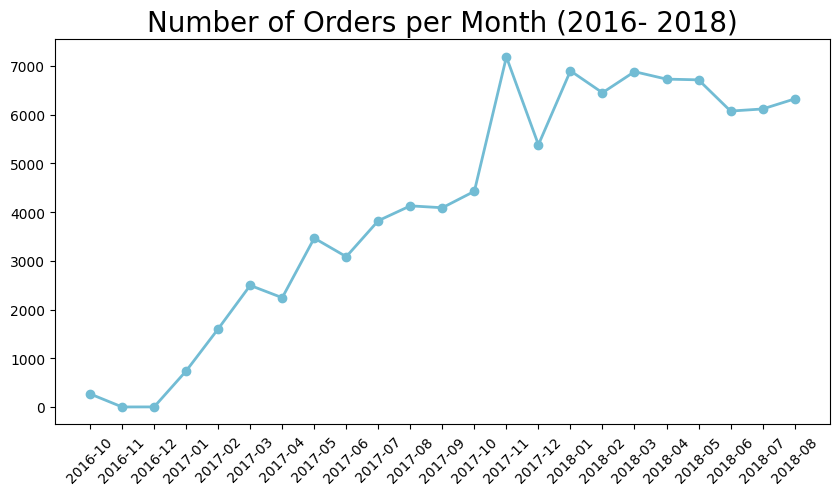

In [135]:
# Membuat visualisasi data order_count atau jumlah penjualan selama beberapa bulan
plt.figure(figsize=(10,5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth = 2, color="#72BCD4")
plt.title("Number of Orders per Month (2016- 2018)", loc="center", fontsize=20) 
plt.yticks(fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# Hasil visualisasi menunjukkan peningkatan jumlah pemesanan sejak bulan september 2016 hingga agustus 2018

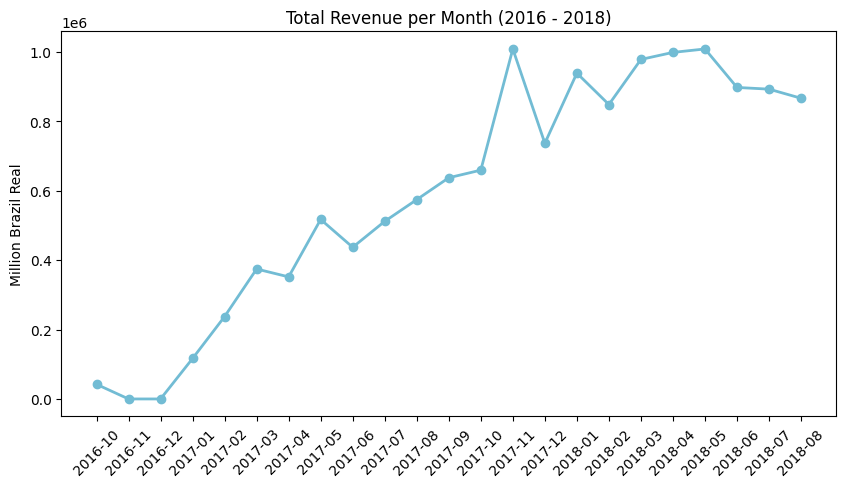

In [136]:
# Membuat visualisasi data jumlah revenue dalam beberapa bulan terakhir
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker = 'o',
    linewidth = 2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016 - 2018)")
plt.ylabel("Million Brazil Real")
plt.xticks(fontsize=10, rotation = 45)
plt.yticks(fontsize = 10)
plt.show()

# Sejalan dengan jumlah penjualan, jumlah pendapatan juga meningkat seiring waktu dari tahun 2016 hingga 2018

**Insight:**
- Penjualan dan pendapatan terus meningkat seiring tahun
- kepuasan konsumen berdasarkan review produk memiliki tren fluktuatif dengan rata-rata review terendah di bulan November 2016
- Kepuasan konsumen berdasarkan review produk dalam 30 hari terakhir menunjukkan hasil yang positif dengan 63% berada di bintang 5
- Kepuasan konsumen berdasarkan banyaknya delay menunjukkan bahwa konsumen puas dengan 90% lebih pengiriman tidak delay
- Demografi pelanggan terbanyak berada di kota sau paulo dan negara SP
- SP menjadi negara dengan jumlah penjualan dan pendapatan terbanyak dan RR menjadi negara dengan jumlah penjualan dan pendapatan terendah.
- Sau paulo menjadi kota dengan jumlah penjualan dan pendapatan terbanyak dna polo petroquimico de triunfu memiliki jumlah pendapatan yang paling sedikit.
- kartu kredit merupakan jenis pembayaran yang paling disukai


## Analisis Lanjutan (Opsional)

In [137]:
sales_df.head()

,product_id,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,is_delayed
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1.0,debit_card,1.0,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,False
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,1.0,voucher,1.0,265.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,False
2,96bd76ec8810374ed1b65e291975717f,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,1.0,credit_card,1.0,87.62,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,False
3,cef67bcfe19066a932b7673e239eb23d,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,1.0,credit_card,2.0,121.84,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,False
4,9dc1a7de274444849c219cff195d0b71,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,1.0,credit_card,4.0,46.19,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,False


In [138]:
sales_df.isna().sum()

product_id                       0
product_photos_qty               0
product_category_name_english    0
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
is_delayed                       0
dtype: int64

### RFM Analysis

In [139]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,is_delayed
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,False


In [140]:
rfm_df = sales_df.groupby(by="customer_id", as_index = False).agg({
    "order_purchase_timestamp":"max", # Mengambil tanggal order terakhir
    "order_id": "nunique", # Menghitung jumlah order
    "price" : "sum" # menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung kapan pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = sales_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x : (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis = 1, inplace=True)

rfm_df["dummy_customer_id"] = [f"{i:03}" for i in range(1, len(rfm_df) + 1)]
rfm_df.head()

,customer_id,frequency,monetary,recency,dummy_customer_id
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,001
1,000161a058600d5901f007fab4c27140,1,54.90,409,002
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,003
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,004
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,005


C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1940851598.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="dummy_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1940851598.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="dummy_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\cecep\AppData\Local\Temp\ipykernel_9164\1940851598.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

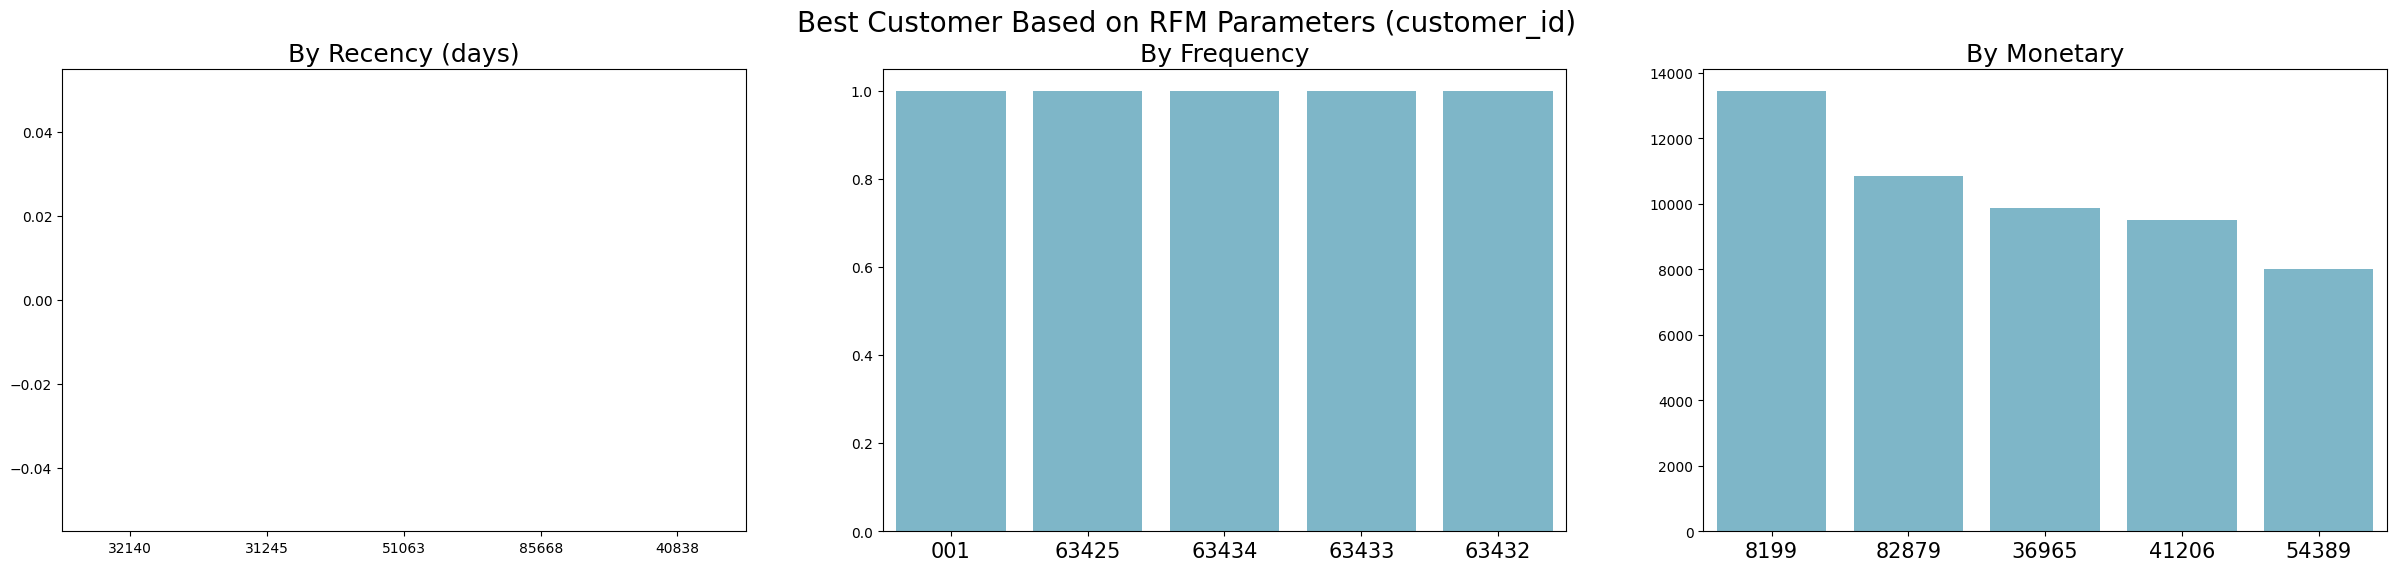

In [141]:
# Visualiasi Data
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="dummy_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10)
 
sns.barplot(y="frequency", x="dummy_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="dummy_customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

**Bagaimana demografi konsumen?**
- Hasil analisis menunjukkan bahwa demografi konsumen pada Ecommerce mayoritas berasal dari Negara SP dan Kota Sau Paulo

**Produk apa yang paling banyak dan paling sedikit terjual?**
- Furniture decor menjadi produk yang paling banyak terjual dan security and services menjadi produk yang paling sedikit terjual
- Health and beauty merupakan produk yang memiliki jumlah pendapatan terbanyak sedangkan yang terendah berasal dari security and service.

**Wilayah mana saja yang memiliki tingkat transaksi dan penjualan tertinggi dan terendah?**
- SP menjadi negara dengan jumlah pendapatan dan jumlah penjualan terbanyak, sedangkan jumlah pendapatan dan jumlah penjualan terendah berasal dari Negara RR
- sau paulo menjadi kota dengan jumlah pendapatan terbanyak, sedangkan polo petruqiumincu de triunfu memiliki jumlah pendapatan terendah.
**Jenis pembayaran apakah yang paling sering digunakan customers dan memiliki jumlah nilai terbesar saat pembelian?**
- Credit card menjadi jenis pembayaran yang paling diminati, diikuti dengan boleto dan voucer

**Bagaimana tingkat kepuasan konsumen apabila diukur melalui tingkat delay pengiriman dan review produk?**
- Review skor barang menunjukkan trend yang fluktuatif dengan jumlah skor terendah berada di bulan November 2016 dan Maret 2018
- Lebih dari 63% pengguna memberikan skor bintang lima berdasarkan data 30 hari terakhir..
- Sepanjang 3 tahun terakhir, pengiriman barang menunjukkan hal positif yaitu 93% tidak delay

**Bagaimana strategi yang dapat diterapkan untuk meningkatkan penjualan berdasarkan karakteristik konsumen yang ada?**
- Berdasarkan hal tersebut, pemberian promo dan diskon dapat diberikan pada konsumen di Negara SP dan Kota Sao Paulo untuk tetap meningkatkan jumlah kontribusi pembelian mereka secara konsisten.
- Mempertahankan konsistensi dari produk yang dijual dan pengiriman barang agar tidak terjadi penurunan kepuasan konsumen.
- Untuk wilayah yang memiliki pendapatan rendah perlu identifikasi lebih lanjut dari faktor eksternal nya untuk memahami tingkah laku mereka, mencakup kondisi makroekonomi, infrastruktur untuk mendukung pembelian online, dan daya beli masyarakat.

**Persiapan apa saja yang perlu dilakukan untuk melaksanakan strategi tersebut?**
- Persiapan yang dilakukan mencakup planning untuk membuat kampanye marketing dan analisis lebih mendalam pada daerah yang memiliki penjualan yang rendah

**Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?**
- Analisis ini menunjukkan bahwa tingkat penjualan dan pendapatan terus naik secara konsisten dari  tahun 2016 hingga 2018.

### Menyimpan Data Hasil Data Wrangling

In [144]:
# # sales_df.to_csv("sales_df.csv", index=False)
# # customer_satisfaction_df.to_csv("customer_satisfaction_df.csv", index=False)
# # sellers_df.to_csv("sellers_df.csv", index=False)
# # order_reviews_df.to_csv("order_reviews_df.csv", index=False)
# # orders_customers_df.to_csv("orders_customers_df.csv", index=False)
# # order_payments_df.to_csv("order_payments_df.csv", index=False)
# # orders_df.to_csv("orders_df.csv", index=False)
# # customers_df.to_csv("customers_df.csv", index=False)
# sales_by_location_df.to_csv("sales_by_location_df.csv", index = False)

### Gabungkan Data sales_df, customers_df, customer_satisfaction_df, sales_by_location_df Untuk Keperluan Membuat Dashboard


In [145]:
sales_customers_df = pd.merge(
    left=sales_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

In [146]:
sales_customers_satisfaction_df = pd.merge(
    left= sales_customers_df,
    right= customer_satisfaction_df,
    how ="left",
    left_on="order_id",
    right_on= "order_id"
)


In [147]:
# drop tidak relevan
sales_customers_satisfaction_df.drop(columns=[
    'customer_id_y',
    'is_delayed_y',
], inplace=True)

In [148]:
# Rename
sales_customers_satisfaction_df.rename(columns={
    "customer_id_x": "customer_id",
    "is_delayed_x": "is_delayed"
}, inplace=True)

In [150]:
sales_customers_satisfaction_location_df = pd.merge(
    left= sales_customers_satisfaction_df,
    right= sales_by_location_df,
    how ="left",
    left_on="order_id",
    right_on= "order_id"
)

In [151]:
sales_customers_satisfaction_location_df.drop(columns=[
    'product_photos_qty_y',
    'product_category_name_english_y',
    'price_y',
    'freight_value_y',
    'payment_type_y',
    'payment_value_y',
    'customer_id_y',
    'customer_zip_code_prefix_y',
    'customer_city_y',
    'customer_state_y',
    'product_id_y'
], inplace=True)

In [156]:
# Rename

sales_customers_satisfaction_location_df.rename(columns={
    'product_photos_qty_x' : 'product_photos_qty_y',
    'product_category_name_english_x' : 'product_category_name_english',
    'price_x': 'price',
    'freight_value_x':'freight_value',
    'payment_type_x':'payment_type',
    'payment_value_x':'payment_value',
    'customer_id_x': 'customer_id',
    'customer_zip_code_prefix_x': 'customer_zip_code_prefix',
    'customer_city_x':'customer_city',
    'customer_state_x':'customer_state',
    'product_id_x':'product_id'
}, inplace=True)

In [ ]:
all_df = sales_customers_satisfaction_location_df 
all_df.info()
# print("duplicate:", all_df.duplicated().sum())

all_df.drop_duplicates(inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187359 entries, 0 to 187358
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     187359 non-null  object        
 1   product_photos_qty_y           187359 non-null  float64       
 2   product_category_name_english  187359 non-null  object        
 3   order_id                       187359 non-null  object        
 4   order_item_id                  187359 non-null  int64         
 5   seller_id                      187359 non-null  object        
 6   shipping_limit_date            187359 non-null  datetime64[ns]
 7   price                          187359 non-null  float64       
 8   freight_value                  187359 non-null  float64       
 9   payment_sequential             187359 non-null  float64       
 10  payment_type                   187359 non-null  object        
 11  

In [174]:

all_df.dropna(axis=0, inplace=True)
all_df.isna().sum()
all_df.info()
# print("duplicate:", all_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 113090 entries, 0 to 187358
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     113090 non-null  object        
 1   product_photos_qty_y           113090 non-null  float64       
 2   product_category_name_english  113090 non-null  object        
 3   order_id                       113090 non-null  object        
 4   order_item_id                  113090 non-null  int64         
 5   seller_id                      113090 non-null  object        
 6   shipping_limit_date            113090 non-null  datetime64[ns]
 7   price                          113090 non-null  float64       
 8   freight_value                  113090 non-null  float64       
 9   payment_sequential             113090 non-null  float64       
 10  payment_type                   113090 non-null  object        
 11  payme

In [176]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113090 entries, 0 to 187358
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     113090 non-null  object        
 1   product_photos_qty_y           113090 non-null  float64       
 2   product_category_name_english  113090 non-null  object        
 3   order_id                       113090 non-null  object        
 4   order_item_id                  113090 non-null  int64         
 5   seller_id                      113090 non-null  object        
 6   shipping_limit_date            113090 non-null  datetime64[ns]
 7   price                          113090 non-null  float64       
 8   freight_value                  113090 non-null  float64       
 9   payment_sequential             113090 non-null  float64       
 10  payment_type                   113090 non-null  object        
 11  payme

### Menyimpan Data Hasil Data Wrangling

In [175]:
# # sales_df.to_csv("sales_df.csv", index=False)
# # customer_satisfaction_df.to_csv("customer_satisfaction_df.csv", index=False)
# # sellers_df.to_csv("sellers_df.csv", index=False)
# # order_reviews_df.to_csv("order_reviews_df.csv", index=False)
# # orders_customers_df.to_csv("orders_customers_df.csv", index=False)
# # order_payments_df.to_csv("order_payments_df.csv", index=False)
# # orders_df.to_csv("orders_df.csv", index=False)
# # customers_df.to_csv("customers_df.csv", index=False)
# sales_by_location_df.to_csv("sales_by_location_df.csv", index = False)
all_df.to_csv("all_df.csv", index=False)